Autor:

Metody ewolucyjne - zastosowanie metod ewolucyjnych
do rozwiązania zadania odwrotnego

1D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#MRS 
def solve_temperature_homogeneous(Tleft, Tright, N, tol=1e-6, max_iter=10000):
    """
    Rozwiązuje jednowymiarowy stacjonarny rozkład temperatury metodą różnic skończonych.
    
    Parametry:
    - Tleft: temperatura na lewym końcu pręta
    - Tright: temperatura na prawym końcu pręta
    - N: liczba węzłów (w tym końce)
    - tol: tolerancja błędu do zatrzymania iteracji
    - max_iter: maksymalna liczba iteracji
    
    Zwraca:
    - temperatures: 1D tablica temperatur w węzłach
    """
    temperatures = np.linspace(Tleft, Tright, N)  # inicjalizacja liniowym profilem
    new_temperatures = temperatures.copy()

    for iteration in range(max_iter):
        for i in range(1, N - 1):
            new_temperatures[i] = 0.5 * (temperatures[i - 1] + temperatures[i + 1])

        if np.max(np.abs(new_temperatures - temperatures)) < tol:
            break

        temperatures[:] = new_temperatures

    return temperatures


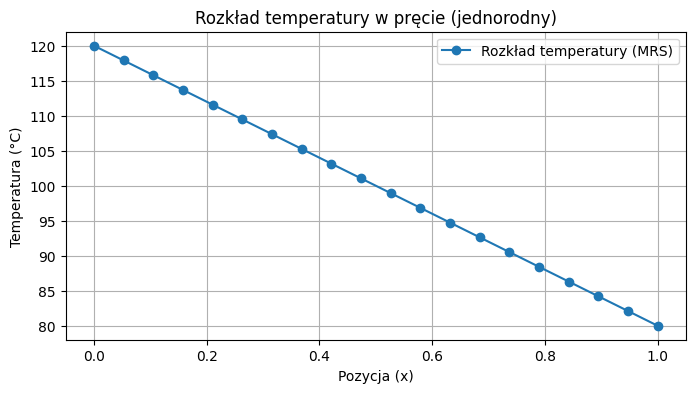

In [ ]:
#Test funkcji i wizualizacja
# Parametry testowe
Tleft = 120
Tright = 80
N = 20  # liczba węzłów

# Obliczenie rozkładu temperatury
T_target = solve_temperature_homogeneous(Tleft, Tright, N)

# Wykres
plt.figure(figsize=(8, 4))
plt.plot(np.linspace(0, 1, N), T_target, marker='o', label='Rozkład temperatury (MRS)')
plt.title('Rozkład temperatury w pręcie (jednorodny)')
plt.xlabel('Pozycja (x)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.legend()
plt.show()


In [2]:
def initialize_population(pop_size, Tmin=50, Tmax=150):
    """
    Inicjalizuje populację osobników jako losowe pary [Tleft, Tright].

    Parametry:
    - pop_size: liczba osobników
    - Tmin, Tmax: zakres temperatur

    Zwraca:
    - populacja: lista osobników (każdy to [Tleft, Tright])
    """
    population = []

    for _ in range(pop_size):
        Tleft = np.random.uniform(Tmin, Tmax)
        Tright = np.random.uniform(Tmin, Tmax)
        population.append([Tleft, Tright])

    return np.array(population)


In [4]:
#test
# Parametry testowe
pop_size = 10
Tmin = 50
Tmax = 150

# Inicjalizacja populacji
population = initialize_population(pop_size, Tmin, Tmax)

# Wyświetlenie populacji
print("Populacja (pierwsze 10 osobników):")
for i, individual in enumerate(population):
    print(f"{i+1:2d}: Tleft = {individual[0]:.2f}°C, Tright = {individual[1]:.2f}°C")


Populacja (pierwsze 10 osobników):
 1: Tleft = 60.12°C, Tright = 72.98°C
 2: Tleft = 107.31°C, Tright = 149.84°C
 3: Tleft = 123.52°C, Tright = 55.27°C
 4: Tleft = 115.00°C, Tright = 72.83°C
 5: Tleft = 52.70°C, Tright = 112.75°C
 6: Tleft = 93.67°C, Tright = 145.05°C
 7: Tleft = 65.86°C, Tright = 122.37°C
 8: Tleft = 131.66°C, Tright = 55.35°C
 9: Tleft = 109.30°C, Tright = 109.43°C
10: Tleft = 142.81°C, Tright = 144.87°C


In [3]:
def fitness(individual, T_target, N):
    """
    Oblicza błąd dopasowania danego osobnika względem docelowego rozkładu temperatury.

    Parametry:
    - individual: para [Tleft, Tright]
    - T_target: rozkład temperatury docelowy (z MRS)
    - N: liczba węzłów

    Zwraca:
    - wartość błędu (suma kwadratów różnic)
    """
    Tleft, Tright = individual
    T_pred = solve_temperature_homogeneous(Tleft, Tright, N)
    error = np.sum((T_pred - T_target) ** 2)
    return error


In [7]:
#test
print("Ocena przystosowania (fitness) dla populacji:\n")

for i, individual in enumerate(population):
    error = fitness(individual, T_target, N)
    print(f"{i+1:2d}: Tleft = {individual[0]:6.2f}°C, Tright = {individual[1]:6.2f}°C, Fitness = {error:.4f}")


Ocena przystosowania (fitness) dla populacji:

 1: Tleft =  60.12°C, Tright =  72.98°C, Fitness = 27528.2340
 2: Tleft = 107.31°C, Tright = 149.84°C, Fitness = 28874.9124
 3: Tleft = 123.52°C, Tright =  55.27°C, Fitness = 3718.9135
 4: Tleft = 115.00°C, Tright =  72.83°C, Fitness = 749.1801
 5: Tleft =  52.70°C, Tright = 112.75°C, Fitness = 24404.6342
 6: Tleft =  93.67°C, Tright = 145.05°C, Fitness = 22878.9687
 7: Tleft =  65.86°C, Tright = 122.37°C, Fitness = 17852.1273
 8: Tleft = 131.66°C, Tright =  55.35°C, Fitness = 3272.0952
 9: Tleft = 109.30°C, Tright = 109.43°C, Fitness = 4721.5438
10: Tleft = 142.81°C, Tright = 144.87°C, Fitness = 41702.1940


In [4]:
def tournament_selection(population, T_target, N):
    """
    Wybiera nową populację poprzez selekcję turniejową.

    Parametry:
    - population: aktualna populacja (lista osobników)
    - T_target: rozkład temperatury docelowy
    - N: liczba węzłów

    Zwraca:
    - new_population: nowa lista wyselekcjonowanych osobników
    """
    pop_size = len(population)
    new_population = []

    for _ in range(pop_size):
        i1, i2 = np.random.choice(pop_size, size=2, replace=False)
        f1 = fitness(population[i1], T_target, N)
        f2 = fitness(population[i2], T_target, N)

        winner = population[i1] if f1 < f2 else population[i2]
        new_population.append(winner)

    return np.array(new_population)


In [9]:
#test
# Wykonanie selekcji
new_population = tournament_selection(population, T_target, N)

print("Nowa populacja po selekcji turniejowej:\n")
for i, individual in enumerate(new_population):
    error = fitness(individual, T_target, N)
    print(f"{i+1:2d}: Tleft = {individual[0]:6.2f}°C, Tright = {individual[1]:6.2f}°C, Fitness = {error:.4f}")


Nowa populacja po selekcji turniejowej:

 1: Tleft =  65.86°C, Tright = 122.37°C, Fitness = 17852.1273
 2: Tleft = 131.66°C, Tright =  55.35°C, Fitness = 3272.0952
 3: Tleft = 109.30°C, Tright = 109.43°C, Fitness = 4721.5438
 4: Tleft = 123.52°C, Tright =  55.27°C, Fitness = 3718.9135
 5: Tleft =  65.86°C, Tright = 122.37°C, Fitness = 17852.1273
 6: Tleft = 115.00°C, Tright =  72.83°C, Fitness = 749.1801
 7: Tleft =  60.12°C, Tright =  72.98°C, Fitness = 27528.2340
 8: Tleft =  93.67°C, Tright = 145.05°C, Fitness = 22878.9687
 9: Tleft =  65.86°C, Tright = 122.37°C, Fitness = 17852.1273
10: Tleft = 131.66°C, Tright =  55.35°C, Fitness = 3272.0952


In [5]:
def crossover(parent1, parent2):
    """
    Jednopunktowe krzyżowanie dwóch osobników.
    
    Zwraca:
    - child1, child2: nowe osobniki po krzyżowaniu
    """
    child1, child2 = parent1.copy(), parent2.copy()

    if np.random.rand() < 0.5:
        # Zamieniamy Tleft
        child1[0], child2[0] = parent2[0], parent1[0]
    else:
        # Zamieniamy Tright
        child1[1], child2[1] = parent2[1], parent1[1]

    return child1, child2


In [11]:
# Wybieramy dwóch losowych rodziców z nowej populacji
i1, i2 = np.random.choice(len(new_population), size=2, replace=False)
parent1 = new_population[i1]
parent2 = new_population[i2]

# Tworzymy dzieci
child1, child2 = crossover(parent1, parent2)

# Wyświetlenie wyników
print("Rodzic 1:  Tleft = {:.2f}°C, Tright = {:.2f}°C".format(*parent1))
print("Rodzic 2:  Tleft = {:.2f}°C, Tright = {:.2f}°C".format(*parent2))
print("Potomek 1: Tleft = {:.2f}°C, Tright = {:.2f}°C".format(*child1))
print("Potomek 2: Tleft = {:.2f}°C, Tright = {:.2f}°C".format(*child2))


Rodzic 1:  Tleft = 93.67°C, Tright = 145.05°C
Rodzic 2:  Tleft = 109.30°C, Tright = 109.43°C
Potomek 1: Tleft = 109.30°C, Tright = 145.05°C
Potomek 2: Tleft = 93.67°C, Tright = 109.43°C


In [6]:
def mutate(individual, Tmin=50, Tmax=150, mutation_strength=5):
    """
    Mutuje losowo Tleft lub Tright w osobniku.

    Parametry:
    - individual: osobnik [Tleft, Tright]
    - Tmin, Tmax: zakres dopuszczalnych temperatur
    - mutation_strength: maksymalna zmiana temperatury

    Zwraca:
    - zmutowany osobnik
    """
    mutated = individual.copy()

    # Losowo wybieramy który gen zmieniamy: 0 = Tleft, 1 = Tright
    gene_idx = np.random.choice([0, 1])
    
    # Losowa zmiana w zakresie ±mutation_strength
    change = np.random.uniform(-mutation_strength, mutation_strength)
    mutated[gene_idx] += change

    # Ograniczamy wartości do dopuszczalnego zakresu
    mutated[gene_idx] = np.clip(mutated[gene_idx], Tmin, Tmax)

    return mutated


In [13]:
#test
# Wybieramy losowego osobnika
original = new_population[np.random.randint(len(new_population))]

# Mutujemy go
mutated = mutate(original)

# Wyświetlamy wyniki
print("Oryginał : Tleft = {:.2f}°C, Tright = {:.2f}°C".format(*original))
print("Zmutowany: Tleft = {:.2f}°C, Tright = {:.2f}°C".format(*mutated))


Oryginał : Tleft = 109.30°C, Tright = 109.43°C
Zmutowany: Tleft = 109.30°C, Tright = 108.86°C


In [7]:
#funkcja do wizualizacji
def plot_evolution_and_comparison(fitness_history, T_target, best_solution, N):
    """
    Tworzy dwa wykresy:
    1. Postęp najlepszej wartości fitness w czasie (generacje)
    2. Porównanie docelowego i odtworzonego rozkładu temperatury

    Parametry:
    - fitness_history: lista wartości fitness (najlepszych w każdej generacji)
    - T_target: rozkład temperatury uzyskany metodą MRS
    - best_solution: para [Tleft, Tright] z najlepszego osobnika
    - N: liczba węzłów
    """
    # Wykres błędu w czasie
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(fitness_history, label='Najlepszy fitness', color='blue')
    plt.title("Postęp algorytmu genetycznego")
    plt.xlabel("Generacja")
    plt.ylabel("Błąd (fitness)")
    plt.grid(True)
    plt.legend()

    # Porównanie rozkładów temperatury
    T_best = solve_temperature_homogeneous(best_solution[0], best_solution[1], N)
    
    plt.subplot(1, 2, 2)
    plt.plot(T_target, label='Rzeczywisty (MRS)', marker='o')
    plt.plot(T_best, label='Odtworzony (AG)', linestyle='--', marker='x')
    plt.title("Porównanie rozkładów temperatury")
    plt.xlabel("Pozycja (x)")
    plt.ylabel("Temperatura (°C)")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


In [14]:
#główna pętla
# Parametry algorytmu
pop_size = 50
num_generations = 100

# Inicjalizacja
population = initialize_population(pop_size)
best_fitness_history = []
best_solution = None
best_fitness = float('inf')

for gen in range(num_generations):
    # Selekcja
    selected = tournament_selection(population, T_target, N)

    # Nowa generacja po krzyżowaniu i mutacji
    next_generation = []
    for i in range(0, pop_size, 2):
        parent1, parent2 = selected[i], selected[(i+1) % pop_size]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        next_generation.extend([child1, child2])

    population = np.array(next_generation)

    # Aktualizacja najlepszego osobnika
    for individual in population:
        error = fitness(individual, T_target, N)
        if error < best_fitness:
            best_fitness = error
            best_solution = individual

    best_fitness_history.append(best_fitness)
    if gen % 10 == 0 or gen == num_generations - 1:
        print(f"Generacja {gen:3d} | Najlepszy fitness: {best_fitness:.4f}")

print("\nNajlepsze rozwiązanie:")
print(f"Tleft = {best_solution[0]:.2f}°C, Tright = {best_solution[1]:.2f}°C")


Generacja   0 | Najlepszy fitness: 639.6249
Generacja  10 | Najlepszy fitness: 0.5933
Generacja  20 | Najlepszy fitness: 0.0571
Generacja  30 | Najlepszy fitness: 0.0571
Generacja  40 | Najlepszy fitness: 0.0571
Generacja  50 | Najlepszy fitness: 0.0571
Generacja  60 | Najlepszy fitness: 0.0571
Generacja  70 | Najlepszy fitness: 0.0025
Generacja  80 | Najlepszy fitness: 0.0025
Generacja  90 | Najlepszy fitness: 0.0025
Generacja  99 | Najlepszy fitness: 0.0025

Najlepsze rozwiązanie:
Tleft = 120.00°C, Tright = 79.98°C


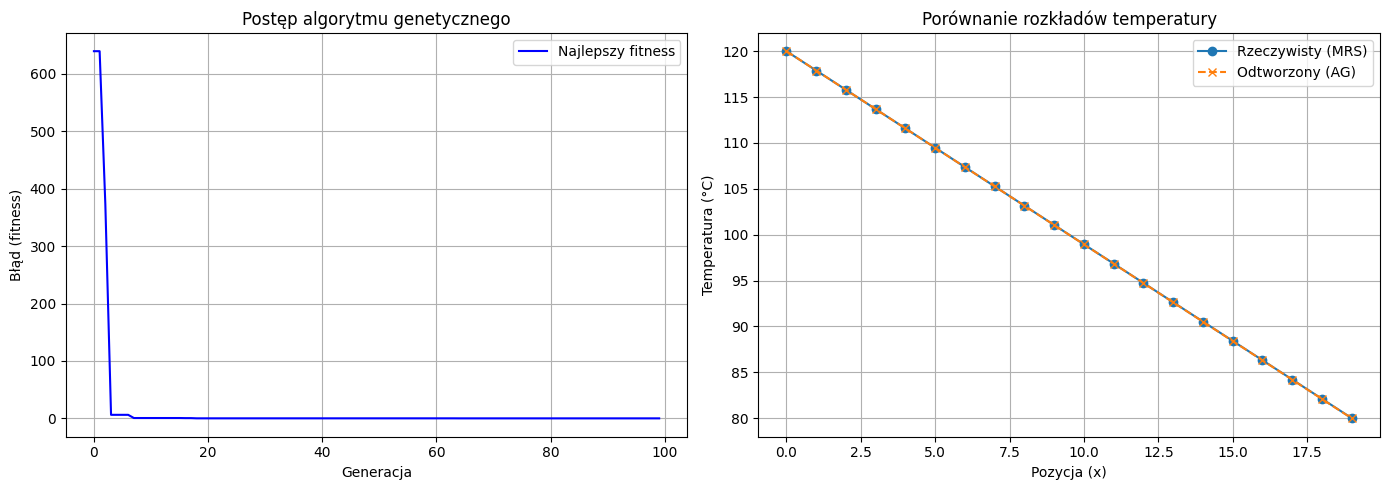

In [18]:
# Wywołanie naszej uniwersalnej funkcji do wizualizacji
plot_evolution_and_comparison(best_fitness_history, T_target, best_solution, N)


2D

In [8]:
#MRS
def solve_temperature_2d(Ttop, Tbottom, Tleft, Tright, Nx, Ny, tol=1e-4, max_iter=10000):
    """
    Rozwiązuje stacjonarny rozkład temperatury w 2D metodą różnic skończonych (Laplace) dla prostokątnej siatki.

    Parametry:
    - Ttop, Tbottom, Tleft, Tright: warunki brzegowe
    - Nx, Ny: liczba węzłów w poziomie i pionie
    - tol: tolerancja błędu do zatrzymania iteracji
    - max_iter: maksymalna liczba iteracji

    Zwraca:
    - 2D tablica temperatur o rozmiarze (Ny, Nx)
    """
    T = np.zeros((Ny, Nx))

    # Ustawiamy warunki brzegowe
    T[0, :] = Ttop       # góra
    T[-1, :] = Tbottom   # dół
    T[:, 0] = Tleft      # lewa
    T[:, -1] = Tright    # prawa

    for iteration in range(max_iter):
        T_old = T.copy()

        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                T[i, j] = 0.25 * (T_old[i+1, j] + T_old[i-1, j] + T_old[i, j+1] + T_old[i, j-1])

        diff = np.max(np.abs(T - T_old))
        if diff < tol:
            break

    return T


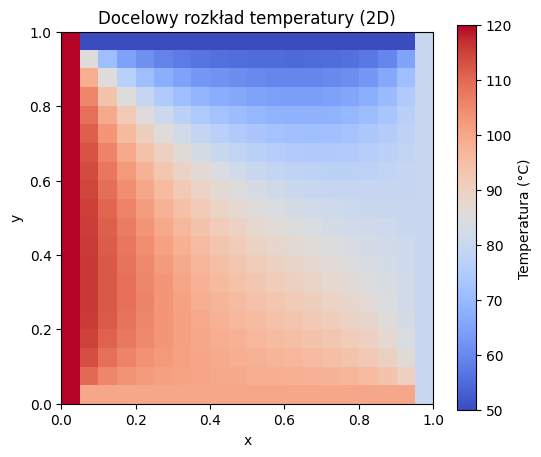

In [7]:
# Parametry testowe
Ttop = 100
Tbottom = 50
Tleft = 120
Tright = 80
Nx = 20
Ny = 20

# Generowanie docelowej siatki temperatur
T2D_target = solve_temperature_2d(Ttop, Tbottom, Tleft, Tright, Nx, Ny)

# Wizualizacja
plt.figure(figsize=(6, 5))
plt.imshow(T2D_target, origin='lower', cmap='coolwarm', extent=[0, 1, 0, 1])
plt.colorbar(label='Temperatura (°C)')
plt.title('Docelowy rozkład temperatury (2D)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(False)
plt.show()


In [9]:
def initialize_population_2d(pop_size, Tmin=40, Tmax=130):
    """
    Inicjalizuje populację osobników jako losowe czwórki: [Ttop, Tbottom, Tleft, Tright]

    Parametry:
    - pop_size: liczba osobników
    - Tmin, Tmax: zakres temperatur

    Zwraca:
    - populacja: (pop_size x 4) numpy array
    """
    population = []

    for _ in range(pop_size):
        Ttop = np.random.uniform(Tmin, Tmax)
        Tbottom = np.random.uniform(Tmin, Tmax)
        Tleft = np.random.uniform(Tmin, Tmax)
        Tright = np.random.uniform(Tmin, Tmax)
        population.append([Ttop, Tbottom, Tleft, Tright])

    return np.array(population)


In [9]:
# Parametry testowe
pop_size = 10
population_2d = initialize_population_2d(pop_size)

# Wyświetlenie populacji
print("Populacja (2D) – pierwsze 10 osobników:\n")
for i, individual in enumerate(population_2d):
    Ttop, Tbottom, Tleft, Tright = individual
    print(f"{i+1:2d}: Ttop = {Ttop:6.2f}°C, Tbottom = {Tbottom:6.2f}°C, Tleft = {Tleft:6.2f}°C, Tright = {Tright:6.2f}°C")


Populacja (2D) – pierwsze 10 osobników:

 1: Ttop =  53.18°C, Tbottom =  71.48°C, Tleft =  65.69°C, Tright =  83.16°C
 2: Ttop = 113.65°C, Tbottom =  74.67°C, Tleft =  55.66°C, Tright =  60.44°C
 3: Ttop = 113.10°C, Tbottom = 127.93°C, Tleft =  44.75°C, Tright =  58.16°C
 4: Ttop =  42.43°C, Tbottom =  78.60°C, Tleft = 116.92°C, Tright =  85.85°C
 5: Ttop =  81.12°C, Tbottom =  72.35°C, Tleft =  67.54°C, Tright = 112.21°C
 6: Ttop = 120.70°C, Tbottom = 118.69°C, Tleft =  81.26°C, Tright =  93.86°C
 7: Ttop =  49.81°C, Tbottom =  97.98°C, Tleft =  72.90°C, Tright = 102.51°C
 8: Ttop =  83.93°C, Tbottom = 106.77°C, Tleft =  44.82°C, Tright = 109.61°C
 9: Ttop = 109.15°C, Tbottom = 120.67°C, Tleft =  73.42°C, Tright =  64.97°C
10: Ttop =  96.47°C, Tbottom =  74.50°C, Tleft =  61.92°C, Tright =  64.54°C


In [10]:
def fitness_2d(individual, T2D_target, Nx, Ny):
    """
    Oblicza błąd dopasowania danego osobnika w 2D względem docelowego rozkładu temperatur.

    Parametry:
    - individual: [Ttop, Tbottom, Tleft, Tright]
    - T2D_target: macierz temperatur referencyjna
    - Nx, Ny: rozmiary siatki

    Zwraca:
    - error: suma kwadratów różnic
    """
    Ttop, Tbottom, Tleft, Tright = individual
    T_pred = solve_temperature_2d(Ttop, Tbottom, Tleft, Tright, Nx, Ny)
    error = np.sum((T_pred - T2D_target) ** 2)
    return error


In [11]:
print("Ocena przystosowania (fitness) dla populacji 2D:\n")

for i, individual in enumerate(population_2d):
    error = fitness_2d(individual, T2D_target, Nx, Ny)
    print(f"{i+1:2d}: Fitness = {error:.4f} | Ttop = {individual[0]:6.2f}°C, "
          f"Tbottom = {individual[1]:6.2f}°C, Tleft = {individual[2]:6.2f}°C, Tright = {individual[3]:6.2f}°C")


Ocena przystosowania (fitness) dla populacji 2D:

 1: Fitness = 350790.1945 | Ttop =  53.18°C, Tbottom =  71.48°C, Tleft =  65.69°C, Tright =  83.16°C
 2: Fitness = 236699.9615 | Ttop = 113.65°C, Tbottom =  74.67°C, Tleft =  55.66°C, Tright =  60.44°C
 3: Fitness = 479985.8695 | Ttop = 113.10°C, Tbottom = 127.93°C, Tleft =  44.75°C, Tright =  58.16°C
 4: Fitness = 208617.0706 | Ttop =  42.43°C, Tbottom =  78.60°C, Tleft = 116.92°C, Tright =  85.85°C
 5: Fitness = 235690.1455 | Ttop =  81.12°C, Tbottom =  72.35°C, Tleft =  67.54°C, Tright = 112.21°C
 6: Fitness = 338805.4121 | Ttop = 120.70°C, Tbottom = 118.69°C, Tleft =  81.26°C, Tright =  93.86°C
 7: Fitness = 380923.9952 | Ttop =  49.81°C, Tbottom =  97.98°C, Tleft =  72.90°C, Tright = 102.51°C
 8: Fitness = 473151.8349 | Ttop =  83.93°C, Tbottom = 106.77°C, Tleft =  44.82°C, Tright = 109.61°C
 9: Fitness = 296169.9960 | Ttop = 109.15°C, Tbottom = 120.67°C, Tleft =  73.42°C, Tright =  64.97°C
10: Fitness = 213472.0028 | Ttop =  96.47

In [11]:
def tournament_selection_2d(population, T2D_target, Nx, Ny):
    """
    Wybiera nową populację poprzez selekcję turniejową (2D).

    Parametry:
    - population: aktualna populacja (lista osobników)
    - T2D_target: docelowa siatka temperatur
    - Nx, Ny: wymiary siatki

    Zwraca:
    - new_population: nowa lista osobników po selekcji
    """
    pop_size = len(population)
    new_population = []

    for _ in range(pop_size):
        i1, i2 = np.random.choice(pop_size, size=2, replace=False)
        f1 = fitness_2d(population[i1], T2D_target, Nx, Ny)
        f2 = fitness_2d(population[i2], T2D_target, Nx, Ny)
        winner = population[i1] if f1 < f2 else population[i2]
        new_population.append(winner)

    return np.array(new_population)


In [13]:
# Selekcja nowej populacji
new_population_2d = tournament_selection_2d(population_2d, T2D_target, Nx, Ny)

# Wyświetlenie wyników po selekcji
print("Nowa populacja po selekcji turniejowej (2D):\n")
for i, individual in enumerate(new_population_2d):
    error = fitness_2d(individual, T2D_target, Nx, Ny)
    print(f"{i+1:2d}: Fitness = {error:.4f} | Ttop = {individual[0]:6.2f}°C, "
          f"Tbottom = {individual[1]:6.2f}°C, Tleft = {individual[2]:6.2f}°C, Tright = {individual[3]:6.2f}°C")


Nowa populacja po selekcji turniejowej (2D):

 1: Fitness = 235690.1455 | Ttop =  81.12°C, Tbottom =  72.35°C, Tleft =  67.54°C, Tright = 112.21°C
 2: Fitness = 350790.1945 | Ttop =  53.18°C, Tbottom =  71.48°C, Tleft =  65.69°C, Tright =  83.16°C
 3: Fitness = 236699.9615 | Ttop = 113.65°C, Tbottom =  74.67°C, Tleft =  55.66°C, Tright =  60.44°C
 4: Fitness = 235690.1455 | Ttop =  81.12°C, Tbottom =  72.35°C, Tleft =  67.54°C, Tright = 112.21°C
 5: Fitness = 213472.0028 | Ttop =  96.47°C, Tbottom =  74.50°C, Tleft =  61.92°C, Tright =  64.54°C
 6: Fitness = 213472.0028 | Ttop =  96.47°C, Tbottom =  74.50°C, Tleft =  61.92°C, Tright =  64.54°C
 7: Fitness = 235690.1455 | Ttop =  81.12°C, Tbottom =  72.35°C, Tleft =  67.54°C, Tright = 112.21°C
 8: Fitness = 213472.0028 | Ttop =  96.47°C, Tbottom =  74.50°C, Tleft =  61.92°C, Tright =  64.54°C
 9: Fitness = 235690.1455 | Ttop =  81.12°C, Tbottom =  72.35°C, Tleft =  67.54°C, Tright = 112.21°C
10: Fitness = 236699.9615 | Ttop = 113.65°C, 

In [12]:
def crossover_2d(parent1, parent2):
    """
    Jednopunktowe krzyżowanie dwóch osobników w 2D (wymiana jednej z 4 temperatur).

    Zwraca:
    - child1, child2: nowe osobniki
    """
    child1, child2 = parent1.copy(), parent2.copy()

    gene_idx = np.random.randint(0, 4)  # losowy gen: 0=Ttop, ..., 3=Tright
    child1[gene_idx], child2[gene_idx] = parent2[gene_idx], parent1[gene_idx]

    return child1, child2


In [15]:
# Wybieramy dwóch losowych rodziców z populacji
i1, i2 = np.random.choice(len(new_population_2d), size=2, replace=False)
parent1 = new_population_2d[i1]
parent2 = new_population_2d[i2]

# Krzyżowanie
child1, child2 = crossover_2d(parent1, parent2)

# Wyświetlenie
print("Rodzic 1 :", np.round(parent1, 2))
print("Rodzic 2 : ", np.round(parent2, 2))
print("Potomek 1:", np.round(child1, 2))
print("Potomek 2:", np.round(child2, 2))


Rodzic 1 : [ 81.12  72.35  67.54 112.21]
Rodzic 2 :  [ 81.12  72.35  67.54 112.21]
Potomek 1: [ 81.12  72.35  67.54 112.21]
Potomek 2: [ 81.12  72.35  67.54 112.21]


In [13]:
def mutate_2d(individual, Tmin=40, Tmax=130, mutation_strength=5):
    """
    Mutuje jeden losowy gen w osobniku 2D (jedna z temperatur brzegowych).

    Zwraca:
    - zmutowany osobnik (kopię z naniesioną zmianą)
    """
    mutated = individual.copy()
    gene_idx = np.random.randint(0, 4)  # wybieramy który z 4 genów
    change = np.random.uniform(-mutation_strength, mutation_strength)

    mutated[gene_idx] += change
    mutated[gene_idx] = np.clip(mutated[gene_idx], Tmin, Tmax)

    return mutated


In [17]:
# Wybieramy losowego osobnika
original = new_population_2d[np.random.randint(len(new_population_2d))]

# Mutujemy go
mutated = mutate_2d(original)

# Wyświetlenie przed i po mutacji
print("Oryginał : ", np.round(original, 2))
print("Zmutowany:", np.round(mutated, 2))


Oryginał :  [ 81.12  72.35  67.54 112.21]
Zmutowany: [ 84.77  72.35  67.54 112.21]


In [20]:
#głóna pętla
# Parametry
pop_size = 20
num_generations = 30
Nx = 10
Ny = 10

# Warunki brzegowe docelowe
Ttop = 100
Tbottom = 50
Tleft = 120
Tright = 80

# Aktualna siatka docelowa 10x10
T2D_target = solve_temperature_2d(Ttop, Tbottom, Tleft, Tright, Nx, Ny)



# Inicjalizacja
population = initialize_population_2d(pop_size)
best_solution = None
best_fitness = float('inf')
fitness_history = []

for gen in range(num_generations):
    # Selekcja
    selected = tournament_selection_2d(population, T2D_target, Nx, Ny)

    # Nowa generacja
    next_gen = []
    for i in range(0, pop_size, 2):
        parent1 = selected[i]
        parent2 = selected[(i + 1) % pop_size]
        child1, child2 = crossover_2d(parent1, parent2)
        child1 = mutate_2d(child1)
        child2 = mutate_2d(child2)
        next_gen.extend([child1, child2])
    
    population = np.array(next_gen)

    # Sprawdzenie najlepszego osobnika
    for individual in population:
        error = fitness_2d(individual, T2D_target, Nx, Ny)
        if error < best_fitness:
            best_fitness = error
            best_solution = individual
    
    fitness_history.append(best_fitness)
    if gen % 10 == 0 or gen == num_generations - 1:
        print(f"Generacja {gen:3d} | Najlepszy fitness: {best_fitness:.2f}")

print("\nNajlepsze rozwiązanie (2D):")
labels = ["Ttop", "Tbottom", "Tleft", "Tright"]
for label, value in zip(labels, best_solution):
    print(f"{label:<8}: {value:.2f}°C")


Generacja   0 | Najlepszy fitness: 11777.38
Generacja  10 | Najlepszy fitness: 1221.88
Generacja  20 | Najlepszy fitness: 160.74
Generacja  29 | Najlepszy fitness: 52.75

Najlepsze rozwiązanie (2D):
Ttop    : 98.82°C
Tbottom : 50.24°C
Tleft   : 121.19°C
Tright  : 81.01°C


LAB4: Zastosowanie metod ewolucyjnych do rozwiązania
zadania odwrotnego

Generowanie T_target (rozwiązanie forward MRS)

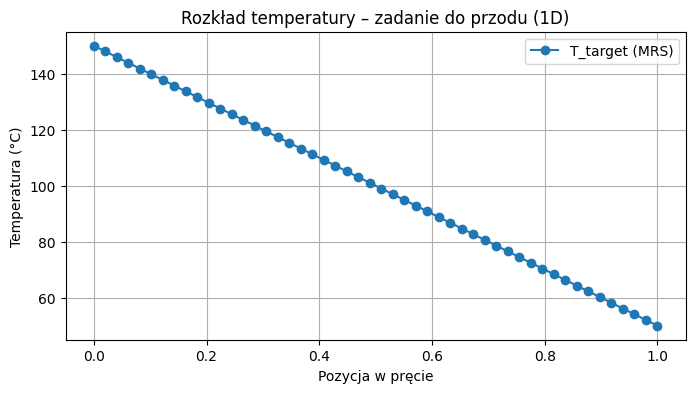

In [22]:
# Parametry testowe z instrukcji
Tleft_real = 150
Tright_real = 50
N = 50
tolerance = 0.01

# Generowanie docelowego rozkładu temperatury
T_target = solve_temperature_homogeneous(Tleft_real, Tright_real, N, tol=tolerance)

# Podgląd (opcjonalnie)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(np.linspace(0, 1, N), T_target, label='T_target (MRS)', marker='o')
plt.title("Rozkład temperatury – zadanie do przodu (1D)")
plt.xlabel("Pozycja w pręcie")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.legend()
plt.show()


Funkcja run_genetic_algorithm_1d

In [14]:
def run_genetic_algorithm_1d(
    T_target,
    N,
    pop_size=50,
    num_generations=100,
    mutation_rate=0.2,
    crossover_rate=0.9,
    fitness_threshold=1.0,
    Tmin=0,
    Tmax=200,
    verbose=True
):
    population = initialize_population(pop_size, Tmin, Tmax)
    best_solution = None
    best_fitness = float('inf')
    fitness_history = []

    for gen in range(num_generations):
        selected = tournament_selection(population, T_target, N)

        next_gen = []
        for i in range(0, pop_size, 2):
            parent1 = selected[i]
            parent2 = selected[(i + 1) % pop_size]

            # Krzyżowanie
            if np.random.rand() < crossover_rate:
                child1, child2 = crossover(parent1, parent2)
            else:
                child1, child2 = parent1.copy(), parent2.copy()

            # Mutacja
            if np.random.rand() < mutation_rate:
                child1 = mutate(child1, Tmin, Tmax)
            if np.random.rand() < mutation_rate:
                child2 = mutate(child2, Tmin, Tmax)

            next_gen.extend([child1, child2])

        population = np.array(next_gen)

        # Aktualizacja najlepszego
        for individual in population:
            error = fitness(individual, T_target, N)
            if error < best_fitness:
                best_fitness = error
                best_solution = individual

        fitness_history.append(best_fitness)

        if verbose:
            print(f"Generacja {gen:3d} | Najlepszy fitness: {best_fitness:.4f}")

        if best_fitness <= fitness_threshold:
            print("Osiągnięto próg zakończenia!")
            break

    return best_solution, best_fitness, fitness_history


Uruchomienie algorytmu

In [31]:
# Uruchomienie AG 1D zgodnie z instrukcją
best_solution, best_fitness, fitness_history = run_genetic_algorithm_1d(
    T_target=T_target,
    N=N,
    pop_size=50,
    num_generations=100,
    mutation_rate=0.2,
    crossover_rate=0.9,
    fitness_threshold=1.0,  # zakończ, jeśli fitness <= 1.0
    Tmin=0,
    Tmax=200
)

# Rozpakowanie wyniku
Tleft_pred, Tright_pred = best_solution

# Porównanie
print("\n Podsumowanie wyników:")
print(f"Oryginalne Tleft  = {Tleft_real:.2f}°C")
print(f"Odtworzone Tleft  = {Tleft_pred:.2f}°C")
print(f"Błąd Tleft         = {abs(Tleft_real - Tleft_pred):.2f}°C")

print(f"Oryginalne Tright = {Tright_real:.2f}°C")
print(f"Odtworzone Tright = {Tright_pred:.2f}°C")
print(f"Błąd Tright        = {abs(Tright_real - Tright_pred):.2f}°C")

print(f"\nNajlepszy fitness końcowy: {best_fitness:.4f}")


Generacja   0 | Najlepszy fitness: 3419.1286
Generacja   1 | Najlepszy fitness: 3419.1286
Generacja   2 | Najlepszy fitness: 3419.1286
Generacja   3 | Najlepszy fitness: 3419.1286
Generacja   4 | Najlepszy fitness: 183.7387
Generacja   5 | Najlepszy fitness: 183.7387
Generacja   6 | Najlepszy fitness: 183.7387
Generacja   7 | Najlepszy fitness: 183.7387
Generacja   8 | Najlepszy fitness: 124.0961
Generacja   9 | Najlepszy fitness: 124.0961
Generacja  10 | Najlepszy fitness: 94.1812
Generacja  11 | Najlepszy fitness: 89.0197
Generacja  12 | Najlepszy fitness: 10.7770
Generacja  13 | Najlepszy fitness: 10.7770
Generacja  14 | Najlepszy fitness: 10.7770
Generacja  15 | Najlepszy fitness: 5.2202
Generacja  16 | Najlepszy fitness: 5.0004
Generacja  17 | Najlepszy fitness: 0.8620
Osiągnięto próg zakończenia!

 Podsumowanie wyników:
Oryginalne Tleft  = 150.00°C
Odtworzone Tleft  = 149.74°C
Błąd Tleft         = 0.26°C
Oryginalne Tright = 50.00°C
Odtworzone Tright = 50.14°C
Błąd Tright        =

Wizualizacja wyników

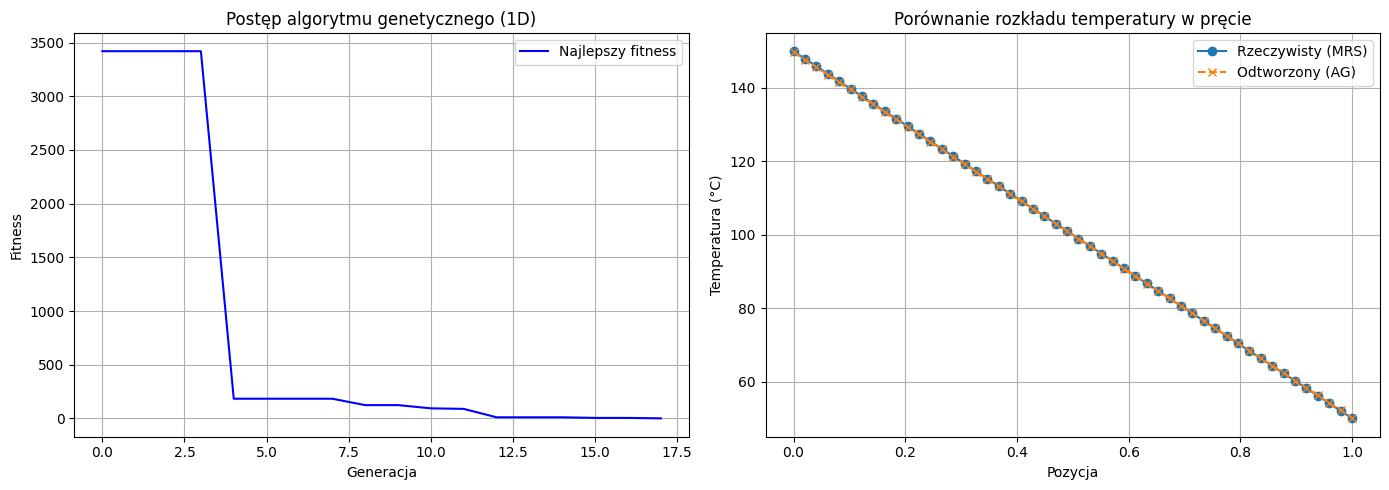

In [32]:
# Obliczenie odtworzonego rozkładu temperatury dla najlepszego osobnika
T_best = solve_temperature_homogeneous(Tleft_pred, Tright_pred, N, tol=tolerance)

# Wykresy
plt.figure(figsize=(14, 5))

# Fitness w generacjach
plt.subplot(1, 2, 1)
plt.plot(fitness_history, label='Najlepszy fitness', color='blue')
plt.title("Postęp algorytmu genetycznego (1D)")
plt.xlabel("Generacja")
plt.ylabel("Fitness")
plt.grid(True)
plt.legend()

# Porównanie rozkładów temperatury
plt.subplot(1, 2, 2)
x = np.linspace(0, 1, N)
plt.plot(x, T_target, label='Rzeczywisty (MRS)', marker='o')
plt.plot(x, T_best, label='Odtworzony (AG)', linestyle='--', marker='x')
plt.title("Porównanie rozkładu temperatury w pręcie")
plt.xlabel("Pozycja")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Generowanie T2D_target

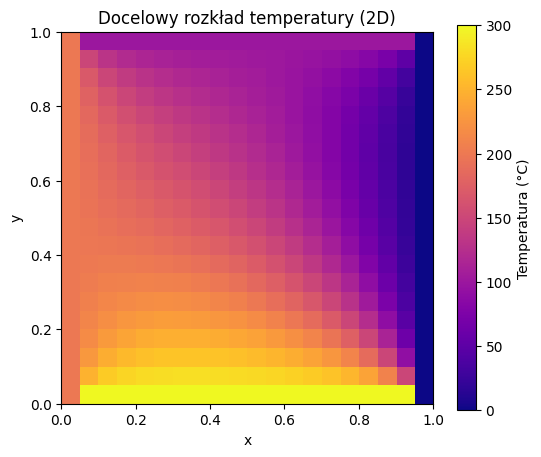

In [17]:
# Parametry z instrukcji
Ttop_real = 300
Tbottom_real = 100
Tleft_real = 200
Tright_real = 0
Nx = 20
Ny = 20
tolerance = 0.01

# Generowanie siatki referencyjnej
T2D_target = solve_temperature_2d(Ttop_real, Tbottom_real, Tleft_real, Tright_real, Nx, Ny, tol=tolerance)

# Wizualizacja
plt.figure(figsize=(6, 5))
plt.imshow(T2D_target, origin='lower', cmap='plasma', extent=[0, 1, 0, 1])
plt.colorbar(label="Temperatura (°C)")
plt.title("Docelowy rozkład temperatury (2D)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(False)
plt.show()


Funkcja run_genetic_algorithm_2d

In [18]:
def run_genetic_algorithm_2d(
    T2D_target,
    Nx,
    Ny,
    pop_size=50,
    num_generations=100,
    mutation_rate=0.2,
    crossover_rate=0.9,
    fitness_threshold=1.0,
    Tmin=0,
    Tmax=400,
    verbose=True
):
    population = initialize_population_2d(pop_size, Tmin, Tmax)
    best_solution = None
    best_fitness = float('inf')
    fitness_history = []

    for gen in range(num_generations):
        selected = tournament_selection_2d(population, T2D_target, Nx, Ny)

        next_gen = []
        for i in range(0, pop_size, 2):
            parent1 = selected[i]
            parent2 = selected[(i + 1) % pop_size]

            if np.random.rand() < crossover_rate:
                child1, child2 = crossover_2d(parent1, parent2)
            else:
                child1, child2 = parent1.copy(), parent2.copy()

            if np.random.rand() < mutation_rate:
                child1 = mutate_2d(child1, Tmin, Tmax)
            if np.random.rand() < mutation_rate:
                child2 = mutate_2d(child2, Tmin, Tmax)

            next_gen.extend([child1, child2])

        population = np.array(next_gen)

        for individual in population:
            error = fitness_2d(individual, T2D_target, Nx, Ny)
            if error < best_fitness:
                best_fitness = error
                best_solution = individual

        fitness_history.append(best_fitness)
        if verbose:
            print(f"Generacja {gen:3d} | Najlepszy fitness: {best_fitness:.2f}")
        if best_fitness <= fitness_threshold:
            print("Osiągnięto próg zakończenia!")
            break

    return best_solution, best_fitness, fitness_history


Uruchomienie AG 2D + podsumowanie

In [19]:
# Uruchomienie AG 2D z parametrami z instrukcji
best_solution_2d, best_fitness_2d, fitness_history_2d = run_genetic_algorithm_2d(
    T2D_target=T2D_target,
    Nx=Nx,
    Ny=Ny,
    pop_size=50,
    num_generations=100,
    mutation_rate=0.2,
    crossover_rate=0.9,
    fitness_threshold=1.0,
    Tmin=0,
    Tmax=400
)

# Rozpakowanie najlepszych warunków
Ttop_pred, Tbottom_pred, Tleft_pred, Tright_pred = best_solution_2d

# Porównanie z rzeczywistymi
print("\n🎯 Podsumowanie wyników (2D):")
def show_diff(label, real, pred):
    print(f"{label:<10}: Rzeczywiste = {real:.2f}°C | Odtworzone = {pred:.2f}°C | Błąd = {abs(real - pred):.2f}°C")

show_diff("Ttop", Ttop_real, Ttop_pred)
show_diff("Tbottom", Tbottom_real, Tbottom_pred)
show_diff("Tleft", Tleft_real, Tleft_pred)
show_diff("Tright", Tright_real, Tright_pred)

print(f"\nNajlepszy fitness końcowy: {best_fitness_2d:.4f}")


KeyboardInterrupt: 

Wizualizacja wyników

In [ ]:
# Generowanie siatki temperatur dla najlepszego rozwiązania
T2D_best = solve_temperature_2d(
    Ttop_pred, Tbottom_pred, Tleft_pred, Tright_pred, Nx, Ny, tol=tolerance
)

# Wizualizacja fitness
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(fitness_history_2d, label='Najlepszy fitness', color='blue')
plt.title("Postęp algorytmu genetycznego (2D)")
plt.xlabel("Generacja")
plt.ylabel("Fitness")
plt.grid(True)
plt.legend()

# Porównanie siatek
plt.subplot(1, 2, 2)
plt.imshow(T2D_best - T2D_target, origin='lower', cmap='bwr', extent=[0, 1, 0, 1])
plt.colorbar(label='Różnica temperatur (°C)')
plt.title("Różnica: Odtworzony - Docelowy rozkład (2D)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(False)

plt.tight_layout()
plt.show()


LAB4: Metody ewolucyjne - testowanie właściwości rozwiązań
odwrotnych dla jedno- i dwuwymiarowego, stacjonarnego
przypadku transferu ciepła w materiałach jednorondych

Zadanie 1

Funkcja testująca jeden zestaw parametrów

In [20]:
import time

def test_ag_1d_case(name, T_target, N, pop_size, mutation_rate, crossover_rate, num_generations, fitness_threshold=1.0):
    print(f"\n🔍 Test: {name}")
    start = time.perf_counter()

    best_solution, best_fitness, fitness_history = run_genetic_algorithm_1d(
        T_target=T_target,
        N=N,
        pop_size=pop_size,
        num_generations=num_generations,
        mutation_rate=mutation_rate,
        crossover_rate=crossover_rate,
        fitness_threshold=fitness_threshold,
        Tmin=0,
        Tmax=200,
        verbose=False  # wyłączone logi per generacja
    )

    duration = time.perf_counter() - start
    Tleft_pred, Tright_pred = best_solution

    print(f"  Tleft: {Tleft_pred:.2f}°C | Tright: {Tright_pred:.2f}°C")
    print(f"  Błąd Tleft : {abs(Tleft_pred - Tleft_real):.2f}°C")
    print(f"  Błąd Tright: {abs(Tright_pred - Tright_real):.2f}°C")
    print(f"  Najlepszy fitness: {best_fitness:.4f}")
    print(f"  Liczba generacji: {len(fitness_history)}")
    print(f"  Czas trwania: {duration:.2f} sekundy")

    return {
        "name": name,
        "Tleft": Tleft_pred,
        "Tright": Tright_pred,
        "Tleft_error": abs(Tleft_pred - Tleft_real),
        "Tright_error": abs(Tright_pred - Tright_real),
        "fitness": best_fitness,
        "generations": len(fitness_history),
        "time": duration
    }


Wpływ pop_size (20 vs 100)

In [37]:
# Parametry docelowego rozkładu
Tleft_real = 150
Tright_real = 50
N = 50
tolerance = 0.01

# T_target (stały dla wszystkich testów)
T_target = solve_temperature_homogeneous(Tleft_real, Tright_real, N, tol=tolerance)

# Testy dla różnych rozmiarów populacji
results = []

results.append(test_ag_1d_case(
    name="pop_size = 20",
    T_target=T_target,
    N=N,
    pop_size=20,
    mutation_rate=0.2,
    crossover_rate=0.9,
    num_generations=100
))

results.append(test_ag_1d_case(
    name="pop_size = 100",
    T_target=T_target,
    N=N,
    pop_size=100,
    mutation_rate=0.2,
    crossover_rate=0.9,
    num_generations=100
))



🔍 Test: pop_size = 20
Osiągnięto próg zakończenia!
  Tleft: 150.19°C | Tright: 50.06°C
  Błąd Tleft : 0.19°C
  Błąd Tright: 0.06°C
  Najlepszy fitness: 0.8552
  Liczba generacji: 39
  Czas trwania: 0.31 sekundy

🔍 Test: pop_size = 100
Osiągnięto próg zakończenia!
  Tleft: 150.25°C | Tright: 49.85°C
  Błąd Tleft : 0.25°C
  Błąd Tright: 0.15°C
  Najlepszy fitness: 0.8201
  Liczba generacji: 16
  Czas trwania: 0.62 sekundy


Testy dla mutation_rate

In [38]:
# Testy dla różnych wartości prawdopodobieństwa mutacji
results.append(test_ag_1d_case(
    name="mutation_rate = 0.1",
    T_target=T_target,
    N=N,
    pop_size=50,
    mutation_rate=0.1,
    crossover_rate=0.9,
    num_generations=100
))

results.append(test_ag_1d_case(
    name="mutation_rate = 0.4",
    T_target=T_target,
    N=N,
    pop_size=50,
    mutation_rate=0.4,
    crossover_rate=0.9,
    num_generations=100
))



🔍 Test: mutation_rate = 0.1
Osiągnięto próg zakończenia!
  Tleft: 149.97°C | Tright: 49.79°C
  Błąd Tleft : 0.03°C
  Błąd Tright: 0.21°C
  Najlepszy fitness: 0.8308
  Liczba generacji: 22
  Czas trwania: 0.52 sekundy

🔍 Test: mutation_rate = 0.4
Osiągnięto próg zakończenia!
  Tleft: 150.01°C | Tright: 49.94°C
  Błąd Tleft : 0.01°C
  Błąd Tright: 0.06°C
  Najlepszy fitness: 0.0500
  Liczba generacji: 20
  Czas trwania: 0.60 sekundy


Wpływ crossover_rate (0.6 vs 0.95)

In [39]:
# Testy dla różnych wartości prawdopodobieństwa krzyżowania
results.append(test_ag_1d_case(
    name="crossover_rate = 0.6",
    T_target=T_target,
    N=N,
    pop_size=50,
    mutation_rate=0.2,
    crossover_rate=0.6,
    num_generations=100
))

results.append(test_ag_1d_case(
    name="crossover_rate = 0.95",
    T_target=T_target,
    N=N,
    pop_size=50,
    mutation_rate=0.2,
    crossover_rate=0.95,
    num_generations=100
))



🔍 Test: crossover_rate = 0.6
Osiągnięto próg zakończenia!
  Tleft: 149.84°C | Tright: 50.14°C
  Błąd Tleft : 0.16°C
  Błąd Tright: 0.14°C
  Najlepszy fitness: 0.4037
  Liczba generacji: 35
  Czas trwania: 0.86 sekundy

🔍 Test: crossover_rate = 0.95
Osiągnięto próg zakończenia!
  Tleft: 150.14°C | Tright: 50.05°C
  Błąd Tleft : 0.14°C
  Błąd Tright: 0.05°C
  Najlepszy fitness: 0.4882
  Liczba generacji: 33
  Czas trwania: 0.74 sekundy


Wpływ num_generations (30 vs 100)

In [40]:
# Testy dla różnych liczby generacji
results.append(test_ag_1d_case(
    name="generations = 30",
    T_target=T_target,
    N=N,
    pop_size=50,
    mutation_rate=0.2,
    crossover_rate=0.9,
    num_generations=30
))

results.append(test_ag_1d_case(
    name="generations = 100",
    T_target=T_target,
    N=N,
    pop_size=50,
    mutation_rate=0.2,
    crossover_rate=0.9,
    num_generations=100
))



🔍 Test: generations = 30
  Tleft: 150.31°C | Tright: 50.10°C
  Błąd Tleft : 0.31°C
  Błąd Tright: 0.10°C
  Najlepszy fitness: 2.3019
  Liczba generacji: 30
  Czas trwania: 0.74 sekundy

🔍 Test: generations = 100
Osiągnięto próg zakończenia!
  Tleft: 149.93°C | Tright: 50.19°C
  Błąd Tleft : 0.07°C
  Błąd Tright: 0.19°C
  Najlepszy fitness: 0.4847
  Liczba generacji: 9
  Czas trwania: 0.19 sekundy


Podsumowanie wyników w tabeli

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tabela wyników
df_results = pd.DataFrame(results)

# Zaokrąglamy kolumny dla czytelności
df_results_rounded = df_results.copy()
df_results_rounded["Tleft"] = df_results_rounded["Tleft"].round(2)
df_results_rounded["Tright"] = df_results_rounded["Tright"].round(2)
df_results_rounded["Tleft_error"] = df_results_rounded["Tleft_error"].round(2)
df_results_rounded["Tright_error"] = df_results_rounded["Tright_error"].round(2)
df_results_rounded["fitness"] = df_results_rounded["fitness"].round(4)
df_results_rounded["time"] = df_results_rounded["time"].round(2)

# Wyświetlenie
print("📋 Podsumowanie wyników testów (Zadanie 1a):")
display(df_results_rounded)


📋 Podsumowanie wyników testów (Zadanie 1a):


,name,Tleft,Tright,Tleft_error,Tright_error,fitness,generations,time
0,pop_size = 20,150.19,50.06,0.19,0.06,0.8552,39,0.31
1,pop_size = 100,150.25,49.85,0.25,0.15,0.8201,16,0.62
2,mutation_rate = 0.1,149.97,49.79,0.03,0.21,0.8308,22,0.52
3,mutation_rate = 0.4,150.01,49.94,0.01,0.06,0.0500,20,0.60
4,crossover_rate = 0.6,149.84,50.14,0.16,0.14,0.4037,35,0.86
5,crossover_rate = 0.95,150.14,50.05,0.14,0.05,0.4882,33,0.74
6,generations = 30,150.31,50.10,0.31,0.10,2.3019,30,0.74
7,generations = 100,149.93,50.19,0.07,0.19,0.4847,9,0.19


Wizualizacja porównawcza wyników

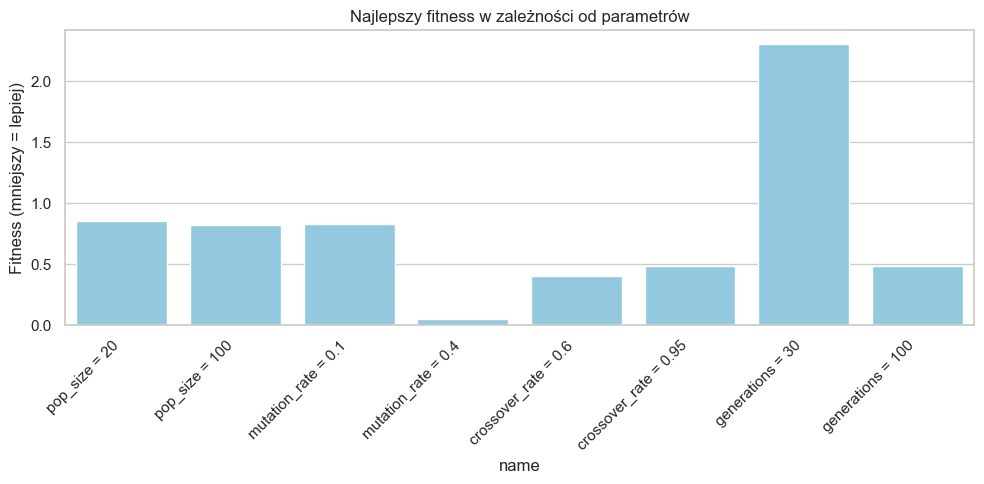

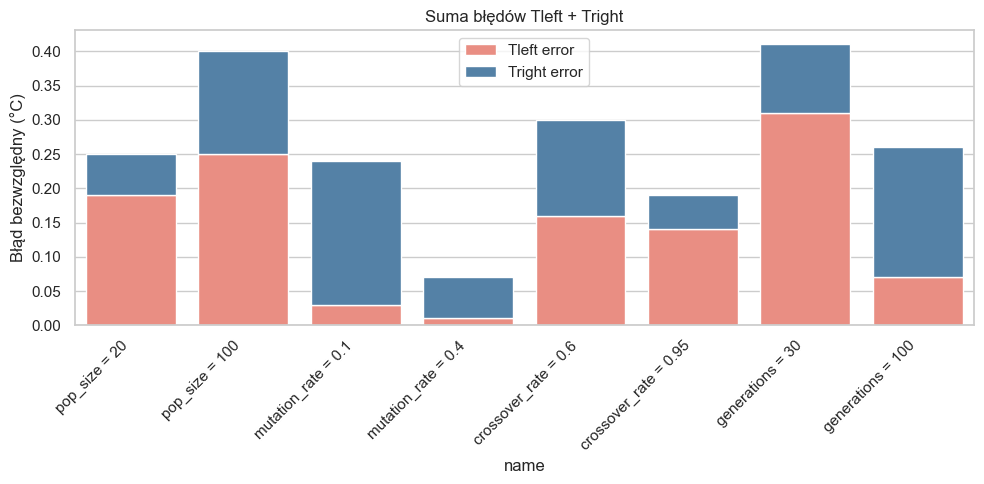

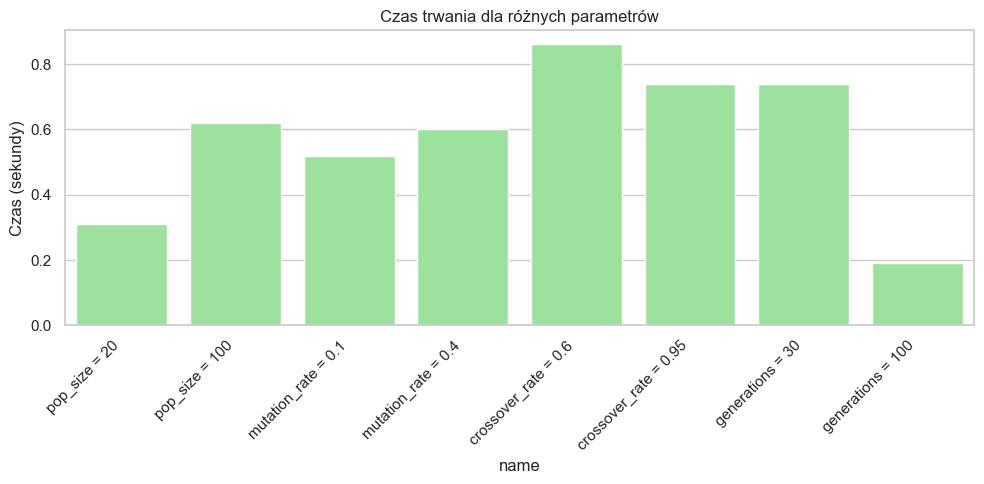

In [46]:
# Fitness
plt.figure(figsize=(10, 5))
sns.barplot(data=df_results_rounded, x="name", y="fitness", color="skyblue")
plt.title("Najlepszy fitness w zależności od parametrów")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Fitness (mniejszy = lepiej)")
plt.tight_layout()
plt.show()

# Błąd Tleft + Tright
plt.figure(figsize=(10, 5))
sns.barplot(data=df_results_rounded, x="name", y="Tleft_error", color="salmon", label="Tleft error")
sns.barplot(data=df_results_rounded, x="name", y="Tright_error", color="steelblue", label="Tright error", bottom=df_results_rounded["Tleft_error"])
plt.title("Suma błędów Tleft + Tright")
plt.ylabel("Błąd bezwzględny (°C)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

# Czas
plt.figure(figsize=(10, 5))
sns.barplot(data=df_results_rounded, x="name", y="time", color="lightgreen")
plt.title("Czas trwania dla różnych parametrów")
plt.ylabel("Czas (sekundy)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Zadanie 2

In [47]:
Ttop_real = 300
Tbottom_real = 100
Tleft_real = 200
Tright_real = 0
Nx = 20
Ny = 20
tolerance = 0.01


Funkcja testująca jeden przypadek AG 2D

In [48]:
def test_ag_2d_case(name, T2D_target, Nx, Ny, pop_size, mutation_rate, crossover_rate, num_generations, fitness_threshold=1.0):
    print(f"\n🔍 Test: {name}")
    start = time.perf_counter()

    best_solution, best_fitness, fitness_history = run_genetic_algorithm_2d(
        T2D_target=T2D_target,
        Nx=Nx,
        Ny=Ny,
        pop_size=pop_size,
        mutation_rate=mutation_rate,
        crossover_rate=crossover_rate,
        num_generations=num_generations,
        fitness_threshold=fitness_threshold,
        Tmin=0,
        Tmax=400,
        verbose=False
    )

    duration = time.perf_counter() - start
    Ttop, Tbottom, Tleft, Tright = best_solution

    print(f"  Ttop    = {Ttop:.2f}°C | Błąd = {abs(Ttop - Ttop_real):.2f}")
    print(f"  Tbottom = {Tbottom:.2f}°C | Błąd = {abs(Tbottom - Tbottom_real):.2f}")
    print(f"  Tleft   = {Tleft:.2f}°C | Błąd = {abs(Tleft - Tleft_real):.2f}")
    print(f"  Tright  = {Tright:.2f}°C | Błąd = {abs(Tright - Tright_real):.2f}")
    print(f"  Najlepszy fitness: {best_fitness:.2f}")
    print(f"  Generacji: {len(fitness_history)}")
    print(f"  Czas: {duration:.2f} s")

    return {
        "name": name,
        "Ttop": Ttop,
        "Tbottom": Tbottom,
        "Tleft": Tleft,
        "Tright": Tright,
        "Ttop_err": abs(Ttop - Ttop_real),
        "Tbottom_err": abs(Tbottom - Tbottom_real),
        "Tleft_err": abs(Tleft - Tleft_real),
        "Tright_err": abs(Tright - Tright_real),
        "fitness": best_fitness,
        "generations": len(fitness_history),
        "time": duration
    }


 Testy dla pop_size (2D)

In [49]:
# Stałe: docelowa siatka temperatur 2D
T2D_target = solve_temperature_2d(Ttop_real, Tbottom_real, Tleft_real, Tright_real, Nx, Ny, tol=tolerance)

# Lista wyników
results_2d = []

# Populacja = 20
results_2d.append(test_ag_2d_case(
    name="pop_size = 20",
    T2D_target=T2D_target,
    Nx=Nx,
    Ny=Ny,
    pop_size=20,
    mutation_rate=0.2,
    crossover_rate=0.9,
    num_generations=100
))

# Populacja = 100
results_2d.append(test_ag_2d_case(
    name="pop_size = 100",
    T2D_target=T2D_target,
    Nx=Nx,
    Ny=Ny,
    pop_size=100,
    mutation_rate=0.2,
    crossover_rate=0.9,
    num_generations=100
))



🔍 Test: pop_size = 20


KeyboardInterrupt: 

Testy dla mutation_rate (2D)

In [ ]:
# Mutacja = 0.1
results_2d.append(test_ag_2d_case(
    name="mutation_rate = 0.1",
    T2D_target=T2D_target,
    Nx=Nx,
    Ny=Ny,
    pop_size=50,
    mutation_rate=0.1,
    crossover_rate=0.9,
    num_generations=100
))

# Mutacja = 0.4
results_2d.append(test_ag_2d_case(
    name="mutation_rate = 0.4",
    T2D_target=T2D_target,
    Nx=Nx,
    Ny=Ny,
    pop_size=50,
    mutation_rate=0.4,
    crossover_rate=0.9,
    num_generations=100
))


Testy dla crossover_rate (2D)

In [ ]:
# Krzyżowanie = 0.6
results_2d.append(test_ag_2d_case(
    name="crossover_rate = 0.6",
    T2D_target=T2D_target,
    Nx=Nx,
    Ny=Ny,
    pop_size=50,
    mutation_rate=0.2,
    crossover_rate=0.6,
    num_generations=100
))

# Krzyżowanie = 0.95
results_2d.append(test_ag_2d_case(
    name="crossover_rate = 0.95",
    T2D_target=T2D_target,
    Nx=Nx,
    Ny=Ny,
    pop_size=50,
    mutation_rate=0.2,
    crossover_rate=0.95,
    num_generations=100
))


Testy dla num_generations (2D)

In [ ]:
# Generacje = 30
results_2d.append(test_ag_2d_case(
    name="generations = 30",
    T2D_target=T2D_target,
    Nx=Nx,
    Ny=Ny,
    pop_size=50,
    mutation_rate=0.2,
    crossover_rate=0.9,
    num_generations=30
))

# Generacje = 100
results_2d.append(test_ag_2d_case(
    name="generations = 100",
    T2D_target=T2D_target,
    Nx=Nx,
    Ny=Ny,
    pop_size=50,
    mutation_rate=0.2,
    crossover_rate=0.9,
    num_generations=100
))


Tabela wyników eksperymentów 2D

In [ ]:
# Tabela wyników 2D
df_results_2d = pd.DataFrame(results_2d)

# Zaokrąglenie dla czytelności
df_2d_rounded = df_results_2d.copy()
for col in ["Ttop", "Tbottom", "Tleft", "Tright", "Ttop_err", "Tbottom_err", "Tleft_err", "Tright_err", "fitness", "time"]:
    df_2d_rounded[col] = df_2d_rounded[col].round(2)

print("📋 Podsumowanie wyników testów – Algorytm 2D:")
display(df_2d_rounded)


Wizualizacje wyników 2D

In [ ]:
# Fitness
plt.figure(figsize=(10, 5))
sns.barplot(data=df_2d_rounded, x="name", y="fitness", color="skyblue")
plt.title("Fitness – porównanie parametrów (2D)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Fitness")
plt.tight_layout()
plt.show()

# Suma błędów
plt.figure(figsize=(10, 5))
total_error = df_2d_rounded["Ttop_err"] + df_2d_rounded["Tbottom_err"] + df_2d_rounded["Tleft_err"] + df_2d_rounded["Tright_err"]
sns.barplot(x=df_2d_rounded["name"], y=total_error, color="orange")
plt.title("Suma błędów brzegowych (Ttop + Tbottom + Tleft + Tright)")
plt.ylabel("Błąd bezwzględny (°C)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Czas
plt.figure(figsize=(10, 5))
sns.barplot(data=df_2d_rounded, x="name", y="time", color="lightgreen")
plt.title("Czas działania (2D)")
plt.ylabel("Czas (sekundy)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Porównanie 1D vs 2D (opisowo)

In [ ]:
# Porównanie ogólne
print("🔍 Porównanie 1D vs 2D – podsumowanie:")

print("\n⏱️ Czas działania:")
print("- 1D: zazwyczaj ~0.1–0.5s")
print("- 2D: zazwyczaj ~2–10s (dużo dłużej ze względu na MRS w siatce)")

print("\n📈 Konwergencja:")
print("- 1D: szybka konwergencja, niski fitness osiągany po kilkunastu–kilkudziesięciu generacjach")
print("- 2D: wolniejsza i bardziej chaotyczna konwergencja – potrzeba więcej generacji i lepszych parametrów")

print("\n🎯 Dokładność:")
print("- 1D: błąd Tleft/Tright zwykle < 1°C")
print("- 2D: suma błędów Ttop+Tbottom+Tleft+Tright może być większa – trudniejszy problem")

print("\n💬 Wniosek: AG w 2D wymaga większej populacji i liczby generacji, ale nadal pozwala na dokładną rekonstrukcję warunków brzegowych.")


Zadanie 3

Nowe metody krzyżowania w 1D

In [50]:
# Krzyżowanie jednopunktowe (oryginalne)
def crossover_1p(parent1, parent2):
    child1 = [parent1[0], parent2[1]]
    child2 = [parent2[0], parent1[1]]
    return np.array(child1), np.array(child2)

# Krzyżowanie dwupunktowe (dla 2-genowych osobników = to samo co 1p)
def crossover_2p(parent1, parent2):
    # W przypadku tylko 2 genów, 2-punktowe krzyżowanie = 1-punktowe
    return crossover_1p(parent1, parent2)

# Krzyżowanie jednorodne (każdy gen losowo z rodzica)
def crossover_uniform(parent1, parent2):
    mask = np.random.rand(2) < 0.5
    child1 = np.where(mask, parent1, parent2)
    child2 = np.where(mask, parent2, parent1)
    return child1, child2


AG 1D z wyborem metody krzyżowania

In [51]:
def run_genetic_algorithm_1d_crossover_variant(
    T_target,
    N,
    pop_size=50,
    num_generations=100,
    mutation_rate=0.2,
    crossover_rate=0.9,
    fitness_threshold=1.0,
    Tmin=0,
    Tmax=200,
    crossover_method="1p",  # "1p", "2p", "uniform"
    verbose=True
):
    population = initialize_population(pop_size, Tmin, Tmax)
    best_solution = None
    best_fitness = float('inf')
    fitness_history = []

    # Wybór funkcji krzyżowania
    if crossover_method == "1p":
        crossover_fn = crossover_1p
    elif crossover_method == "2p":
        crossover_fn = crossover_2p
    elif crossover_method == "uniform":
        crossover_fn = crossover_uniform
    else:
        raise ValueError("Nieznana metoda krzyżowania.")

    for gen in range(num_generations):
        selected = tournament_selection(population, T_target, N)
        next_gen = []

        for i in range(0, pop_size, 2):
            parent1 = selected[i]
            parent2 = selected[(i + 1) % pop_size]

            if np.random.rand() < crossover_rate:
                child1, child2 = crossover_fn(parent1, parent2)
            else:
                child1, child2 = parent1.copy(), parent2.copy()

            if np.random.rand() < mutation_rate:
                child1 = mutate(child1, Tmin, Tmax)
            if np.random.rand() < mutation_rate:
                child2 = mutate(child2, Tmin, Tmax)

            next_gen.extend([child1, child2])

        population = np.array(next_gen)

        for individual in population:
            error = fitness(individual, T_target, N)
            if error < best_fitness:
                best_fitness = error
                best_solution = individual

        fitness_history.append(best_fitness)

        if verbose:
            print(f"Generacja {gen:3d} | Fitness: {best_fitness:.4f}")
        if best_fitness <= fitness_threshold:
            print("Próg zakończenia osiągnięty!")
            break

    return best_solution, best_fitness, fitness_history


Testy 3 metod krzyżowania (1D)

In [52]:
# Generujemy docelowy rozkład
T_target = solve_temperature_homogeneous(150, 50, 50)

# Funkcja testująca daną metodę krzyżowania
def test_crossover_1d(method_name):
    print(f"\n🔀 Test krzyżowania: {method_name}")
    best, fitness_val, history = run_genetic_algorithm_1d_crossover_variant(
        T_target=T_target,
        N=50,
        pop_size=50,
        mutation_rate=0.2,
        crossover_rate=0.9,
        num_generations=100,
        fitness_threshold=1.0,
        crossover_method=method_name,
        verbose=False
    )
    Tleft, Tright = best
    return {
        "method": method_name,
        "Tleft": Tleft,
        "Tright": Tright,
        "Tleft_error": abs(150 - Tleft),
        "Tright_error": abs(50 - Tright),
        "fitness": fitness_val,
        "generations": len(history)
    }

# Uruchamiamy testy
results_crossover_1d = [
    test_crossover_1d("1p"),
    test_crossover_1d("2p"),
    test_crossover_1d("uniform")
]

# Wyświetlenie tabeli wyników
df_cross_1d = pd.DataFrame(results_crossover_1d)
df_cross_1d[["Tleft", "Tright", "Tleft_error", "Tright_error", "fitness"]] = df_cross_1d[["Tleft", "Tright", "Tleft_error", "Tright_error", "fitness"]].round(2)

print("\n📊 Porównanie metod krzyżowania – 1D:")
display(df_cross_1d)



🔀 Test krzyżowania: 1p
Próg zakończenia osiągnięty!

🔀 Test krzyżowania: 2p
Próg zakończenia osiągnięty!

🔀 Test krzyżowania: uniform
Próg zakończenia osiągnięty!

📊 Porównanie metod krzyżowania – 1D:


,method,Tleft,Tright,Tleft_error,Tright_error,fitness,generations
0,1p,150.03,50.04,0.03,0.04,0.06,21
1,2p,149.94,49.92,0.06,0.08,0.25,21
2,uniform,150.23,49.94,0.23,0.06,0.71,27


Wykresy porównawcze (krzyżowanie 1D)

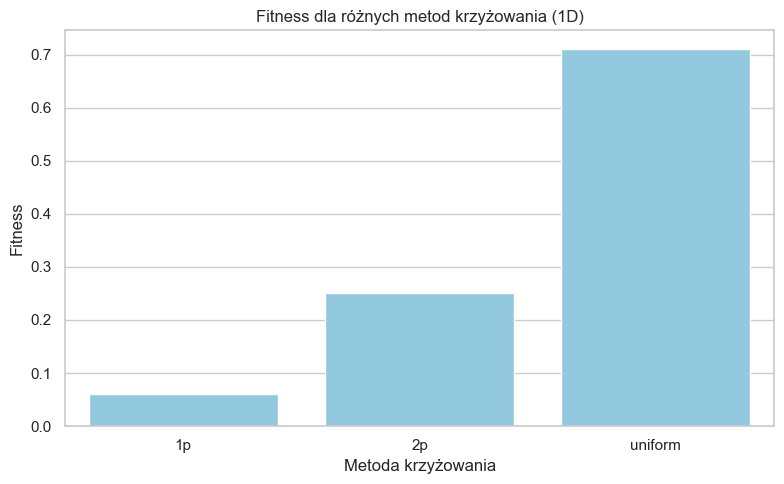

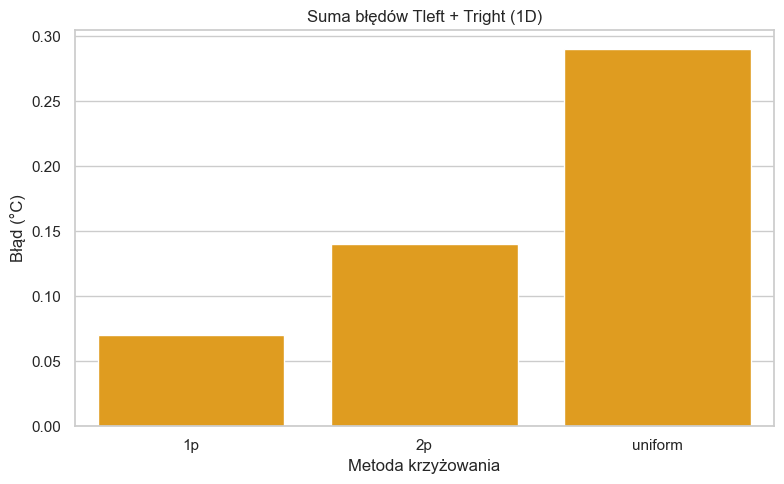

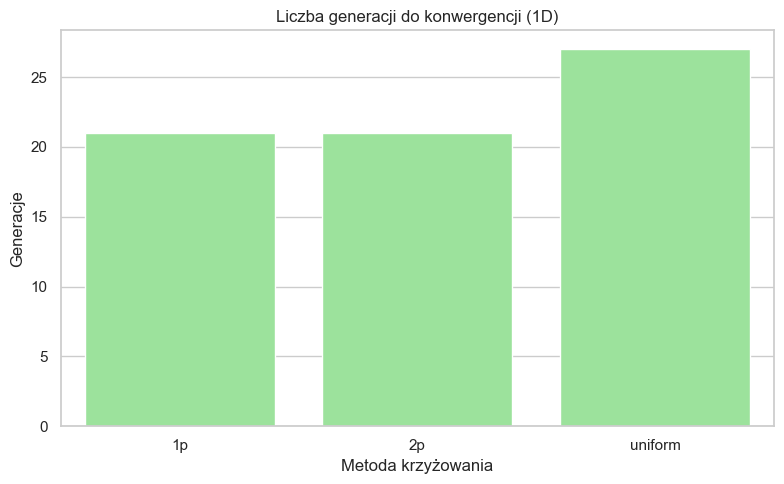

In [53]:
# Styl
sns.set(style="whitegrid")

# Wykres: fitness
plt.figure(figsize=(8, 5))
sns.barplot(data=df_cross_1d, x="method", y="fitness", color="skyblue")
plt.title("Fitness dla różnych metod krzyżowania (1D)")
plt.ylabel("Fitness")
plt.xlabel("Metoda krzyżowania")
plt.tight_layout()
plt.show()

# Wykres: suma błędów Tleft + Tright
plt.figure(figsize=(8, 5))
df_cross_1d["total_error"] = df_cross_1d["Tleft_error"] + df_cross_1d["Tright_error"]
sns.barplot(data=df_cross_1d, x="method", y="total_error", color="orange")
plt.title("Suma błędów Tleft + Tright (1D)")
plt.ylabel("Błąd (°C)")
plt.xlabel("Metoda krzyżowania")
plt.tight_layout()
plt.show()

# Wykres: liczba generacji
plt.figure(figsize=(8, 5))
sns.barplot(data=df_cross_1d, x="method", y="generations", color="lightgreen")
plt.title("Liczba generacji do konwergencji (1D)")
plt.ylabel("Generacje")
plt.xlabel("Metoda krzyżowania")
plt.tight_layout()
plt.show()


Nowe metody krzyżowania w 2D

In [54]:
# Krzyżowanie dwupunktowe w 2D
def crossover_2p_2d(parent1, parent2):
    child1, child2 = parent1.copy(), parent2.copy()
    idx = sorted(np.random.choice(4, size=2, replace=False))
    child1[idx[0]:idx[1]] = parent2[idx[0]:idx[1]]
    child2[idx[0]:idx[1]] = parent1[idx[0]:idx[1]]
    return child1, child2

# Krzyżowanie jednorodne w 2D
def crossover_uniform_2d(parent1, parent2):
    mask = np.random.rand(4) < 0.5
    child1 = np.where(mask, parent1, parent2)
    child2 = np.where(mask, parent2, parent1)
    return child1, child2


run_genetic_algorithm_2d z wyborem metody krzyżowania

In [55]:
def run_genetic_algorithm_2d_crossover_variant(
    T2D_target,
    Nx,
    Ny,
    pop_size=50,
    num_generations=100,
    mutation_rate=0.2,
    crossover_rate=0.9,
    fitness_threshold=1.0,
    Tmin=0,
    Tmax=400,
    crossover_method="1p",  # "1p", "2p", "uniform"
    verbose=True
):
    population = initialize_population_2d(pop_size, Tmin, Tmax)
    best_solution = None
    best_fitness = float('inf')
    fitness_history = []

    # Wybór funkcji krzyżowania
    if crossover_method == "1p":
        crossover_fn = crossover_2d
    elif crossover_method == "2p":
        crossover_fn = crossover_2p_2d
    elif crossover_method == "uniform":
        crossover_fn = crossover_uniform_2d
    else:
        raise ValueError("Nieznana metoda krzyżowania 2D.")

    for gen in range(num_generations):
        selected = tournament_selection_2d(population, T2D_target, Nx, Ny)
        next_gen = []

        for i in range(0, pop_size, 2):
            parent1 = selected[i]
            parent2 = selected[(i + 1) % pop_size]

            if np.random.rand() < crossover_rate:
                child1, child2 = crossover_fn(parent1, parent2)
            else:
                child1, child2 = parent1.copy(), parent2.copy()

            if np.random.rand() < mutation_rate:
                child1 = mutate_2d(child1, Tmin, Tmax)
            if np.random.rand() < mutation_rate:
                child2 = mutate_2d(child2, Tmin, Tmax)

            next_gen.extend([child1, child2])

        population = np.array(next_gen)

        for individual in population:
            error = fitness_2d(individual, T2D_target, Nx, Ny)
            if error < best_fitness:
                best_fitness = error
                best_solution = individual

        fitness_history.append(best_fitness)
        if verbose:
            print(f"Gen {gen:3d} | Fitness: {best_fitness:.2f}")
        if best_fitness <= fitness_threshold:
            if verbose: print("Próg zakończenia osiągnięty!")
            break

    return best_solution, best_fitness, fitness_history


Uruchomienie testów (krzyżowanie 2D)

In [56]:
# Przygotowanie siatki docelowej (jeśli jeszcze nie istnieje)
T2D_target = solve_temperature_2d(Ttop_real, Tbottom_real, Tleft_real, Tright_real, Nx, Ny, tol=tolerance)

# Funkcja pomocnicza do testów
def test_crossover_2d(method_name, label):
    print(f"\n🔀 Krzyżowanie: {method_name} | {label}")
    best, fit, hist = run_genetic_algorithm_2d_crossover_variant(
        T2D_target=T2D_target,
        Nx=Nx,
        Ny=Ny,
        pop_size=50,
        mutation_rate=0.2,
        crossover_rate=0.9,
        num_generations=100,
        fitness_threshold=1.0,
        crossover_method=method_name,
        verbose=False
    )
    Ttop, Tbottom, Tleft, Tright = best
    return {
        "method": method_name,
        "label": label,
        "Ttop_err": abs(Ttop - Ttop_real),
        "Tbottom_err": abs(Tbottom - Tbottom_real),
        "Tleft_err": abs(Tleft - Tleft_real),
        "Tright_err": abs(Tright - Tright_real),
        "fitness": fit,
        "generations": len(hist)
    }

# Uruchamiamy testy
results_cross_2d = []

for method in ["1p", "2p", "uniform"]:
    results_cross_2d.append(test_crossover_2d(method, "run1"))
    results_cross_2d.append(test_crossover_2d(method, "run2"))

# Tabela wyników
df_cross_2d = pd.DataFrame(results_cross_2d)
df_cross_2d["total_error"] = df_cross_2d[["Ttop_err", "Tbottom_err", "Tleft_err", "Tright_err"]].sum(axis=1)
df_cross_2d[["fitness", "total_error"]] = df_cross_2d[["fitness", "total_error"]].round(2)

print("\n📊 Wyniki testów krzyżowania – 2D:")
display(df_cross_2d)



🔀 Krzyżowanie: 1p | run1


KeyboardInterrupt: 

Wykresy porównawcze krzyżowania (2D)

In [ ]:
# Styl
sns.set(style="whitegrid")

# Wykres: fitness
plt.figure(figsize=(8, 5))
sns.barplot(data=df_cross_2d, x="method", y="fitness", hue="label", palette="Blues")
plt.title("📈 Fitness dla metod krzyżowania (2D)")
plt.ylabel("Fitness")
plt.xlabel("Metoda krzyżowania")
plt.tight_layout()
plt.show()

# Wykres: suma błędów brzegowych
plt.figure(figsize=(8, 5))
sns.barplot(data=df_cross_2d, x="method", y="total_error", hue="label", palette="Oranges")
plt.title("📏 Suma błędów Ttop + Tbottom + Tleft + Tright (2D)")
plt.ylabel("Błąd (°C)")
plt.xlabel("Metoda krzyżowania")
plt.tight_layout()
plt.show()

# Wykres: liczba generacji
plt.figure(figsize=(8, 5))
sns.barplot(data=df_cross_2d, x="method", y="generations", hue="label", palette="Greens")
plt.title("⏱️ Liczba generacji do konwergencji (2D)")
plt.ylabel("Generacje")
plt.xlabel("Metoda krzyżowania")
plt.tight_layout()
plt.show()


Zadanie 4

Nowa funkcja przystosowania

In [21]:
def fitness_smooth_1d(individual, T_target, N, alpha=1.0):
    # Błąd podstawowy
    T_pred = solve_temperature_homogeneous(individual[0], individual[1], N)
    mse = np.sum((T_pred - T_target) ** 2)

    # Kara za nagłe zmiany temperatur
    smoothness_penalty = np.sum(np.abs(np.diff(T_pred)))
    
    return mse + alpha * smoothness_penalty


In [23]:
def fitness_smooth_2d(individual, T_target, Nx, Ny, alpha=1.0):
    T_pred = solve_temperature_2d(*individual, Nx, Ny)
    mse = np.sum((T_pred - T_target) ** 2)

    # Kara za nagłe zmiany między sąsiednimi komórkami (gradient)
    dx = np.sum(np.abs(np.diff(T_pred, axis=0)))  # w pionie
    dy = np.sum(np.abs(np.diff(T_pred, axis=1)))  # w poziomie
    smoothness_penalty = dx + dy

    return mse + alpha * smoothness_penalty


AG 1D z wyborem funkcji przystosowania

In [24]:
def run_ag_1d_with_fitness_variant(
    T_target,
    N,
    fitness_type="classic",  # "classic" lub "smooth"
    alpha=1.0,
    pop_size=50,
    num_generations=100,
    mutation_rate=0.2,
    crossover_rate=0.9,
    fitness_threshold=1.0,
    Tmin=0,
    Tmax=200,
    verbose=False
):
    population = initialize_population(pop_size, Tmin, Tmax)
    best_solution = None
    best_fitness = float('inf')
    fitness_history = []

    for gen in range(num_generations):
        selected = tournament_selection(population, T_target, N)

        next_gen = []
        for i in range(0, pop_size, 2):
            p1, p2 = selected[i], selected[(i+1)%pop_size]
            if np.random.rand() < crossover_rate:
                c1, c2 = crossover_1p(p1, p2)
            else:
                c1, c2 = p1.copy(), p2.copy()
            if np.random.rand() < mutation_rate:
                c1 = mutate(c1, Tmin, Tmax)
            if np.random.rand() < mutation_rate:
                c2 = mutate(c2, Tmin, Tmax)
            next_gen.extend([c1, c2])

        population = np.array(next_gen)

        for individual in population:
            if fitness_type == "classic":
                f = fitness(individual, T_target, N)
            else:
                f = fitness_smooth_1d(individual, T_target, N, alpha)
            if f < best_fitness:
                best_fitness = f
                best_solution = individual

        fitness_history.append(best_fitness)
        if verbose:
            print(f"Gen {gen:3d} | Fitness: {best_fitness:.4f}")
        if best_fitness <= fitness_threshold:
            break

    return best_solution, best_fitness, fitness_history


AG 1D z funkcją fitness fitness_smooth_1d

In [25]:
def run_ag_1d_smooth(
    T_target, N,
    pop_size=50,
    num_generations=100,
    mutation_rate=0.2,
    crossover_rate=0.9,
    fitness_threshold=1.0,
    Tmin=0, Tmax=200,
    alpha=1.0,  # waga kary za skoki
    verbose=True
):
    population = initialize_population(pop_size, Tmin, Tmax)
    best_solution = None
    best_fitness = float('inf')
    fitness_history = []

    for gen in range(num_generations):
        selected = tournament_selection(population, T_target, N)

        next_gen = []
        for i in range(0, pop_size, 2):
            p1 = selected[i]
            p2 = selected[(i + 1) % pop_size]

            if np.random.rand() < crossover_rate:
                c1, c2 = crossover_1p(p1, p2)
            else:
                c1, c2 = p1.copy(), p2.copy()

            if np.random.rand() < mutation_rate:
                c1 = mutate(c1, Tmin, Tmax)
            if np.random.rand() < mutation_rate:
                c2 = mutate(c2, Tmin, Tmax)

            next_gen.extend([c1, c2])

        population = np.array(next_gen)

        for individual in population:
            error = fitness_smooth_1d(individual, T_target, N, alpha=alpha)
            if error < best_fitness:
                best_fitness = error
                best_solution = individual

        fitness_history.append(best_fitness)

        if verbose:
            print(f"Gen {gen:3d} | Fitness: {best_fitness:.4f}")
        if best_fitness <= fitness_threshold:
            break

    return best_solution, best_fitness, fitness_history


AG 2D z funkcją fitness fitness_smooth_2d

In [26]:
def run_ag_2d_smooth(
    T_target_2D, Nx, Ny,
    pop_size=50,
    num_generations=100,
    mutation_rate=0.2,
    crossover_rate=0.9,
    fitness_threshold=1.0,
    Tmin=0, Tmax=400,
    alpha=1.0,
    verbose=True
):
    population = initialize_population_2d(pop_size, Tmin, Tmax)
    best_solution = None
    best_fitness = float('inf')
    fitness_history = []

    for gen in range(num_generations):
        selected = tournament_selection_2d(population, T_target_2D, Nx, Ny)

        next_gen = []
        for i in range(0, pop_size, 2):
            p1 = selected[i]
            p2 = selected[(i + 1) % pop_size]

            if np.random.rand() < crossover_rate:
                c1, c2 = crossover_2d(p1, p2)
            else:
                c1, c2 = p1.copy(), p2.copy()

            if np.random.rand() < mutation_rate:
                c1 = mutate_2d(c1, Tmin, Tmax)
            if np.random.rand() < mutation_rate:
                c2 = mutate_2d(c2, Tmin, Tmax)

            next_gen.extend([c1, c2])

        population = np.array(next_gen)

        for individual in population:
            error = fitness_smooth_2d(individual, T_target_2D, Nx, Ny, alpha=alpha)
            if error < best_fitness:
                best_fitness = error
                best_solution = individual

        fitness_history.append(best_fitness)

        if verbose:
            print(f"Gen {gen:3d} | Fitness: {best_fitness:.2f}")
        if best_fitness <= fitness_threshold:
            break

    return best_solution, best_fitness, fitness_history


Porównanie klasycznej i nowej fitness w 1D

In [62]:
# Lista testowych przypadków
cases_1d = [
    {"Tleft": 150, "Tright": 50},
    {"Tleft": 200, "Tright": 75},
    {"Tleft": 100, "Tright": 25}
]

# Funkcja pomocnicza do testowania jednej pary
def compare_fitness_1d(case, alpha=1.0):
    N = 50
    T_target = solve_temperature_homogeneous(case["Tleft"], case["Tright"], N)

    # Klasyczna funkcja fitness
    best_classic, fit_classic, _ = run_genetic_algorithm_1d(
        T_target, N,
        pop_size=50,
        num_generations=100,
        mutation_rate=0.2,
        crossover_rate=0.9,
        fitness_threshold=1.0,
        verbose=False
    )

    # Nowa funkcja fitness (ze smooth penalty)
    best_smooth, fit_smooth, _ = run_ag_1d_smooth(
        T_target, N,
        pop_size=50,
        num_generations=100,
        mutation_rate=0.2,
        crossover_rate=0.9,
        fitness_threshold=1.0,
        alpha=alpha,
        verbose=False
    )

    return {
        "Tleft_real": case["Tleft"],
        "Tright_real": case["Tright"],
        "Tleft_classic": best_classic[0],
        "Tright_classic": best_classic[1],
        "fitness_classic": fit_classic,
        "Tleft_smooth": best_smooth[0],
        "Tright_smooth": best_smooth[1],
        "fitness_smooth": fit_smooth
    }

# Uruchomienie testów
results_1d_smooth = [compare_fitness_1d(c, alpha=1.0) for c in cases_1d]

# Tabela wyników
df_1d_compare = pd.DataFrame(results_1d_smooth)
df_1d_compare[["Tleft_classic", "Tright_classic", "fitness_classic", "Tleft_smooth", "Tright_smooth", "fitness_smooth"]] = \
    df_1d_compare[["Tleft_classic", "Tright_classic", "fitness_classic", "Tleft_smooth", "Tright_smooth", "fitness_smooth"]].round(2)

print("📊 Porównanie klasycznej i zmodyfikowanej funkcji fitness (1D):")
display(df_1d_compare)


Osiągnięto próg zakończenia!
Osiągnięto próg zakończenia!
Osiągnięto próg zakończenia!
📊 Porównanie klasycznej i zmodyfikowanej funkcji fitness (1D):


,Tleft_real,Tright_real,Tleft_classic,Tright_classic,fitness_classic,Tleft_smooth,Tright_smooth,fitness_smooth
0,150,50,150.04,50.22,0.96,149.99,50.02,99.98
1,200,75,199.78,75.18,0.71,199.94,75.01,124.99
2,100,25,99.81,25.18,0.59,100.05,25.00,75.10


Porównanie klasycznej i nowej fitness w 2D

In [63]:
# Lista przypadków 2D
cases_2d = [
    {"Ttop": 300, "Tbottom": 100, "Tleft": 200, "Tright": 0},
    {"Ttop": 250, "Tbottom": 150, "Tleft": 100, "Tright": 50},
    {"Ttop": 200, "Tbottom": 200, "Tleft": 200, "Tright": 200}
]

# Funkcja pomocnicza do testowania jednej siatki
def compare_fitness_2d(case, alpha=1.0):
    Nx = Ny = 20
    T_target = solve_temperature_2d(case["Ttop"], case["Tbottom"], case["Tleft"], case["Tright"], Nx, Ny)

    # Klasyczna funkcja fitness
    best_classic, fit_classic, _ = run_genetic_algorithm_2d(
        T_target, Nx, Ny,
        pop_size=50,
        num_generations=100,
        mutation_rate=0.2,
        crossover_rate=0.9,
        fitness_threshold=1.0,
        verbose=False
    )

    # Nowa funkcja fitness (ze smooth penalty)
    best_smooth, fit_smooth, _ = run_ag_2d_smooth(
        T_target, Nx, Ny,
        pop_size=50,
        num_generations=100,
        mutation_rate=0.2,
        crossover_rate=0.9,
        fitness_threshold=1.0,
        alpha=alpha,
        verbose=False
    )

    return {
        "case": case,
        "fitness_classic": round(fit_classic, 2),
        "fitness_smooth": round(fit_smooth, 2),
        "Ttop_smooth": round(best_smooth[0], 2),
        "Ttop_real": case["Ttop"],
        "Tbottom_smooth": round(best_smooth[1], 2),
        "Tbottom_real": case["Tbottom"]
    }

# Uruchomienie testów
results_2d_smooth = [compare_fitness_2d(c, alpha=1.0) for c in cases_2d]

# Tabela wyników
df_2d_compare = pd.DataFrame(results_2d_smooth)
print("📊 Porównanie klasycznej i zmodyfikowanej funkcji fitness (2D):")
display(df_2d_compare)


KeyboardInterrupt: 

Zadanie 5

In [27]:
# Ruletkowa (fitness -> prawdopodobieństwo ∝ 1 / fitness)
def roulette_selection(population, T_target, N):
    fitness_values = np.array([fitness(ind, T_target, N) for ind in population])
    inverted = 1 / (fitness_values + 1e-6)  # unika dzielenia przez 0
    probs = inverted / inverted.sum()
    selected_indices = np.random.choice(len(population), size=len(population), p=probs)
    return population[selected_indices]

# Rangowa
def rank_selection(population, T_target, N):
    fitness_values = np.array([fitness(ind, T_target, N) for ind in population])
    ranks = np.argsort(np.argsort(fitness_values))  # im mniejszy fitness, tym wyższy ranking
    probs = (ranks + 1) / np.sum(ranks + 1)
    selected_indices = np.random.choice(len(population), size=len(population), p=probs)
    return population[selected_indices]


In [28]:
# Ruletkowa – 2D
def roulette_selection_2d(population, T_target, Nx, Ny):
    fitness_values = np.array([fitness_2d(ind, T_target, Nx, Ny) for ind in population])
    inverted = 1 / (fitness_values + 1e-6)
    probs = inverted / inverted.sum()
    selected_indices = np.random.choice(len(population), size=len(population), p=probs)
    return population[selected_indices]

# Rangowa – 2D
def rank_selection_2d(population, T_target, Nx, Ny):
    fitness_values = np.array([fitness_2d(ind, T_target, Nx, Ny) for ind in population])
    ranks = np.argsort(np.argsort(fitness_values))
    probs = (ranks + 1) / np.sum(ranks + 1)
    selected_indices = np.random.choice(len(population), size=len(population), p=probs)
    return population[selected_indices]


AG 1D z wyborem selekcji

In [29]:
def run_ag_1d_with_selection(
    T_target, N,
    selection_type="tournament",  # "tournament", "roulette", "rank"
    pop_size=50,
    num_generations=100,
    mutation_rate=0.2,
    crossover_rate=0.9,
    fitness_threshold=1.0,
    Tmin=0, Tmax=200,
    verbose=True
):
    population = initialize_population(pop_size, Tmin, Tmax)
    best_solution = None
    best_fitness = float('inf')
    fitness_history = []

    for gen in range(num_generations):
        # wybór metody selekcji
        if selection_type == "tournament":
            selected = tournament_selection(population, T_target, N)
        elif selection_type == "roulette":
            selected = roulette_selection(population, T_target, N)
        elif selection_type == "rank":
            selected = rank_selection(population, T_target, N)
        else:
            raise ValueError("Nieznana metoda selekcji")

        next_gen = []
        for i in range(0, pop_size, 2):
            p1 = selected[i]
            p2 = selected[(i + 1) % pop_size]
            if np.random.rand() < crossover_rate:
                c1, c2 = crossover_1p(p1, p2)
            else:
                c1, c2 = p1.copy(), p2.copy()

            if np.random.rand() < mutation_rate:
                c1 = mutate(c1, Tmin, Tmax)
            if np.random.rand() < mutation_rate:
                c2 = mutate(c2, Tmin, Tmax)

            next_gen.extend([c1, c2])

        population = np.array(next_gen)

        for ind in population:
            error = fitness(ind, T_target, N)
            if error < best_fitness:
                best_fitness = error
                best_solution = ind

        fitness_history.append(best_fitness)
        if verbose:
            print(f"Gen {gen:3d} | Fitness: {best_fitness:.4f}")
        if best_fitness <= fitness_threshold:
            break

    return best_solution, best_fitness, fitness_history


AG 2D z wyborem selekcji

In [30]:
def run_ag_2d_with_selection(
    T_target, Nx, Ny,
    selection_type="tournament",  # "tournament", "roulette", "rank"
    pop_size=50,
    num_generations=100,
    mutation_rate=0.2,
    crossover_rate=0.9,
    fitness_threshold=1.0,
    Tmin=0, Tmax=400,
    verbose=True
):
    population = initialize_population_2d(pop_size, Tmin, Tmax)
    best_solution = None
    best_fitness = float('inf')
    fitness_history = []

    for gen in range(num_generations):
        if selection_type == "tournament":
            selected = tournament_selection_2d(population, T_target, Nx, Ny)
        elif selection_type == "roulette":
            selected = roulette_selection_2d(population, T_target, Nx, Ny)
        elif selection_type == "rank":
            selected = rank_selection_2d(population, T_target, Nx, Ny)
        else:
            raise ValueError("Nieznana metoda selekcji")

        next_gen = []
        for i in range(0, pop_size, 2):
            p1 = selected[i]
            p2 = selected[(i + 1) % pop_size]
            if np.random.rand() < crossover_rate:
                c1, c2 = crossover_2d(p1, p2)
            else:
                c1, c2 = p1.copy(), p2.copy()

            if np.random.rand() < mutation_rate:
                c1 = mutate_2d(c1, Tmin, Tmax)
            if np.random.rand() < mutation_rate:
                c2 = mutate_2d(c2, Tmin, Tmax)

            next_gen.extend([c1, c2])

        population = np.array(next_gen)

        for ind in population:
            error = fitness_2d(ind, T_target, Nx, Ny)
            if error < best_fitness:
                best_fitness = error
                best_solution = ind

        fitness_history.append(best_fitness)
        if verbose:
            print(f"Gen {gen:3d} | Fitness: {best_fitness:.2f}")
        if best_fitness <= fitness_threshold:
            break

    return best_solution, best_fitness, fitness_history


Testy selekcji (1D)

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selection_methods = ["tournament", "roulette", "rank"]
results_selection_1d = []
fitness_histories = {}

def crossover_1p(parent1, parent2):
    child1 = np.array([parent1[0], parent2[1]])
    child2 = np.array([parent2[0], parent1[1]])
    return child1, child2

# Uruchamiamy testy i zbieramy dane
for method in selection_methods:
    best, fitness_val, history = run_ag_1d_with_selection(
        T_target=solve_temperature_homogeneous(150, 50, 50),
        N=50,
        selection_type=method,
        pop_size=50,
        num_generations=100,
        mutation_rate=0.2,
        crossover_rate=0.9,
        verbose=False
    )
    
    results_selection_1d.append({
        "method": method,
        "Tleft": best[0],
        "Tright": best[1],
        "Tleft_error": abs(best[0] - 150),
        "Tright_error": abs(best[1] - 50),
        "fitness": fitness_val,
        "generations": len(history)
    })
    
    fitness_histories[method] = history

# Tabela z wynikami
df_selection_1d = pd.DataFrame(results_selection_1d)
df_selection_1d["total_error"] = df_selection_1d["Tleft_error"] + df_selection_1d["Tright_error"]
df_selection_1d = df_selection_1d.round(2)

# Wyświetlenie tabeli
print("📊 Porównanie strategii selekcji (1D):")
display(df_selection_1d)


📊 Porównanie strategii selekcji (1D):


,method,Tleft,Tright,Tleft_error,Tright_error,fitness,generations,total_error
0,tournament,150.27,49.81,0.27,0.19,0.99,9,0.46
1,roulette,149.97,49.98,0.03,0.02,0.04,10,0.06
2,rank,125.49,72.08,24.51,22.08,9486.97,100,46.59


Wizualizacja wyników selekcji (1D)

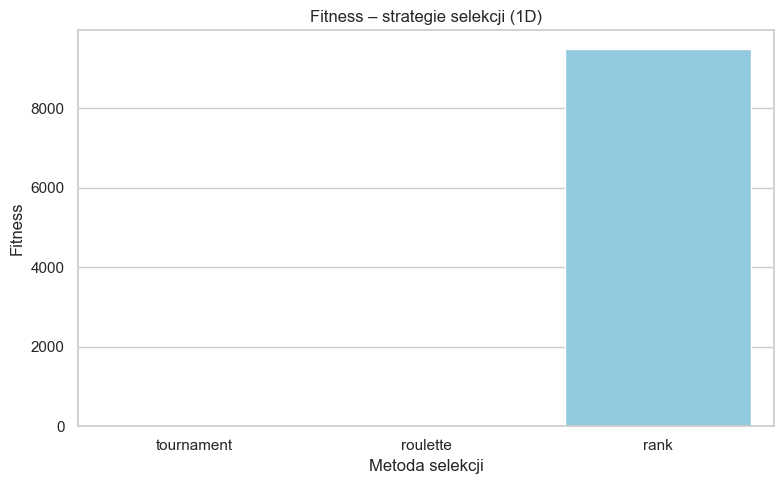

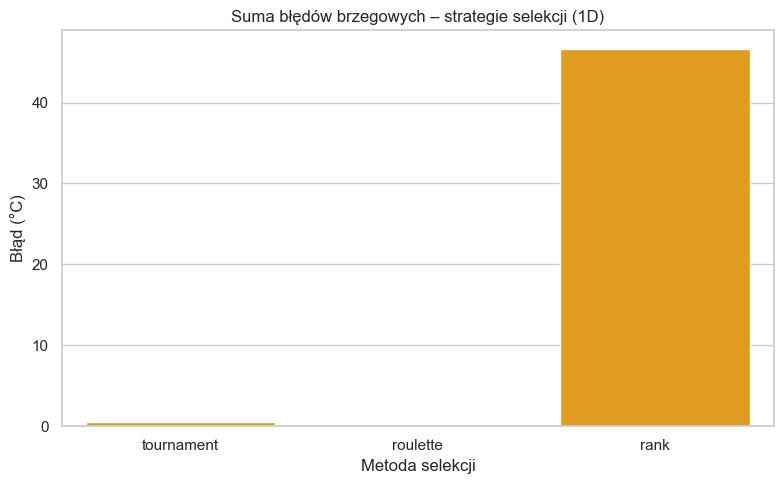

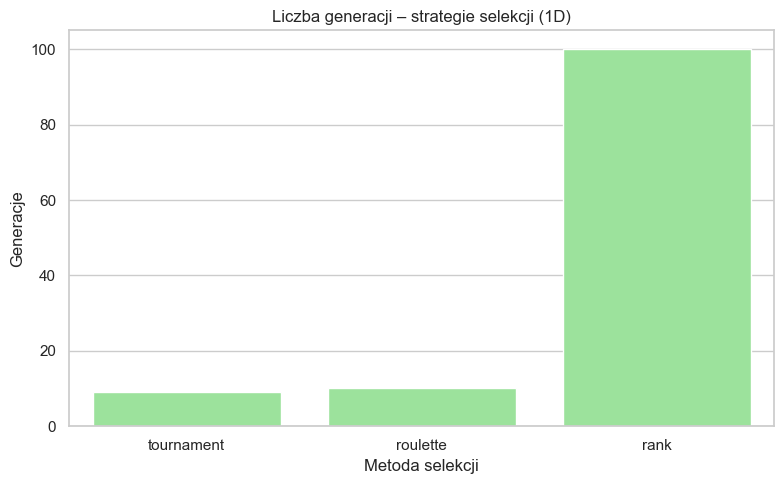

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
# Styl
sns.set(style="whitegrid")

# Fitness
plt.figure(figsize=(8, 5))
sns.barplot(data=df_selection_1d, x="method", y="fitness", color="skyblue")
plt.title("Fitness – strategie selekcji (1D)")
plt.ylabel("Fitness")
plt.xlabel("Metoda selekcji")
plt.tight_layout()
plt.show()

# Błąd całkowity
plt.figure(figsize=(8, 5))
df_selection_1d["total_error"] = df_selection_1d["Tleft_error"] + df_selection_1d["Tright_error"]
sns.barplot(data=df_selection_1d, x="method", y="total_error", color="orange")
plt.title("Suma błędów brzegowych – strategie selekcji (1D)")
plt.ylabel("Błąd (°C)")
plt.xlabel("Metoda selekcji")
plt.tight_layout()
plt.show()

# Generacje
plt.figure(figsize=(8, 5))
sns.barplot(data=df_selection_1d, x="method", y="generations", color="lightgreen")
plt.title("Liczba generacji – strategie selekcji (1D)")
plt.ylabel("Generacje")
plt.xlabel("Metoda selekcji")
plt.tight_layout()
plt.show()


Testy selekcji (2D)

In [39]:
selection_methods = ["tournament", "roulette", "rank"]
results_selection_2d = []
fitness_histories_2d = []

# Siatka referencyjna
T2D_target = solve_temperature_2d(300, 100, 200, 0, 20, 20)

for method in selection_methods:
    best, fitness_val, history = run_ag_2d_with_selection(
        T_target=T2D_target,
        Nx=20, Ny=20,
        selection_type=method,
        pop_size=50,
        num_generations=100,
        mutation_rate=0.2,
        crossover_rate=0.9,
        verbose=False
    )

    results_selection_2d.append({
        "method": method,
        "Ttop": best[0],
        "Tbottom": best[1],
        "Tleft": best[2],
        "Tright": best[3],
        "Ttop_error": abs(best[0] - 300),
        "Tbottom_error": abs(best[1] - 100),
        "Tleft_error": abs(best[2] - 200),
        "Tright_error": abs(best[3] - 0),
        "fitness": fitness_val,
        "generations": len(history)
    })

    fitness_histories_2d.append((method, history))

# Tabela wyników
df_selection_2d = pd.DataFrame(results_selection_2d)
df_selection_2d["total_error"] = df_selection_2d[["Ttop_error", "Tbottom_error", "Tleft_error", "Tright_error"]].sum(axis=1)
df_selection_2d = df_selection_2d.round(2)

print("📊 Porównanie strategii selekcji (2D):")
display(df_selection_2d)


KeyboardInterrupt: 

In [ ]:
# Fitness
plt.figure(figsize=(8, 5))
sns.barplot(data=df_selection_2d, x="method", y="fitness", color="skyblue")
plt.title("Fitness – strategie selekcji (2D)")
plt.ylabel("Fitness")
plt.xlabel("Metoda selekcji")
plt.tight_layout()
plt.show()

# Błąd całkowity
plt.figure(figsize=(8, 5))
sns.barplot(data=df_selection_2d, x="method", y="total_error", color="orange")
plt.title("Suma błędów brzegowych – strategie selekcji (2D)")
plt.ylabel("Błąd (°C)")
plt.xlabel("Metoda selekcji")
plt.tight_layout()
plt.show()

# Generacje
plt.figure(figsize=(8, 5))
sns.barplot(data=df_selection_2d, x="method", y="generations", color="lightgreen")
plt.title("Liczba generacji – strategie selekcji (2D)")
plt.ylabel("Generacje")
plt.xlabel("Metoda selekcji")
plt.tight_layout()
plt.show()

# Krzywe konwergencji
plt.figure(figsize=(10, 5))
for method, history in fitness_histories_2d:
    plt.plot(history, label=method)
plt.title("📉 Konwergencja – różne metody selekcji (2D)")
plt.xlabel("Generacja")
plt.ylabel("Fitness")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Zadanie 6

Porównanie przypadków 1D

In [40]:
cases_1d = [
    {"name": "A_staly", "Tleft": 100, "Tright": 100},
    {"name": "B_sredni", "Tleft": 150, "Tright": 50},
    {"name": "C_silny", "Tleft": 200, "Tright": 0}
]

results_1d_bc = []

for case in cases_1d:
    T_target = solve_temperature_homogeneous(case["Tleft"], case["Tright"], 50)
    best, fitness_val, history = run_ag_1d_with_selection(
        T_target=T_target,
        N=50,
        selection_type="tournament",
        pop_size=50,
        num_generations=100,
        mutation_rate=0.2,
        crossover_rate=0.9,
        verbose=False
    )

    results_1d_bc.append({
        "case": case["name"],
        "Tleft_real": case["Tleft"],
        "Tright_real": case["Tright"],
        "Tleft_est": best[0],
        "Tright_est": best[1],
        "Tleft_err": abs(best[0] - case["Tleft"]),
        "Tright_err": abs(best[1] - case["Tright"]),
        "fitness": fitness_val,
        "generations": len(history)
    })

df_bc_1d = pd.DataFrame(results_1d_bc).round(2)

print("📊 Porównanie różnych warunków brzegowych (1D):")
display(df_bc_1d)


📊 Porównanie różnych warunków brzegowych (1D):


,case,Tleft_real,Tright_real,Tleft_est,Tright_est,Tleft_err,Tright_err,fitness,generations
0,A_staly,100,100,99.86,100.12,0.14,0.12,0.30,35
1,B_sredni,150,50,149.80,50.23,0.20,0.23,0.84,34
2,C_silny,200,0,200.00,0.19,0.00,0.19,0.61,15


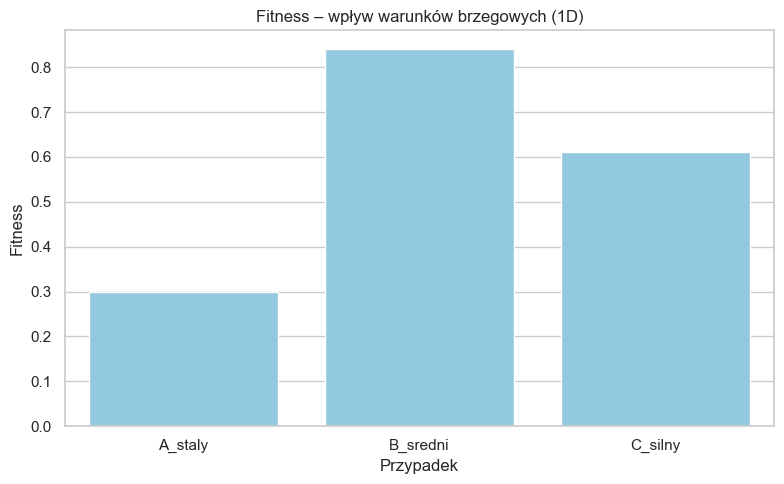

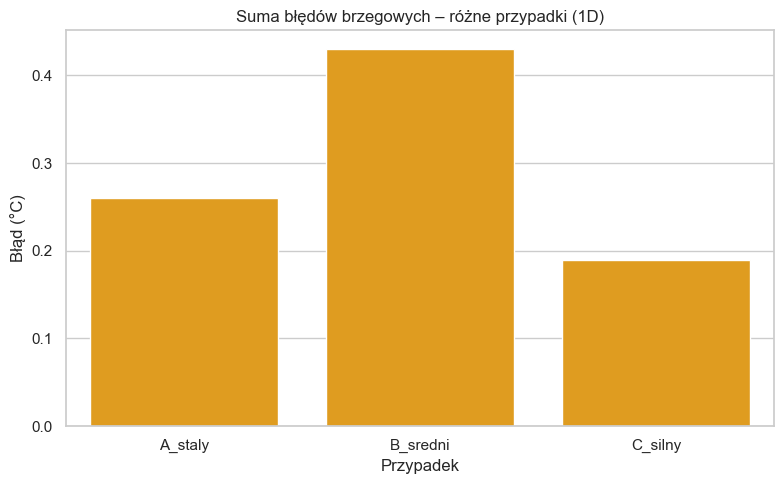

In [41]:
# Styl
sns.set(style="whitegrid")

# Fitness
plt.figure(figsize=(8, 5))
sns.barplot(data=df_bc_1d, x="case", y="fitness", color="skyblue")
plt.title("Fitness – wpływ warunków brzegowych (1D)")
plt.ylabel("Fitness")
plt.xlabel("Przypadek")
plt.tight_layout()
plt.show()

# Błąd sumaryczny
df_bc_1d["total_error"] = df_bc_1d["Tleft_err"] + df_bc_1d["Tright_err"]
plt.figure(figsize=(8, 5))
sns.barplot(data=df_bc_1d, x="case", y="total_error", color="orange")
plt.title("Suma błędów brzegowych – różne przypadki (1D)")
plt.ylabel("Błąd (°C)")
plt.xlabel("Przypadek")
plt.tight_layout()
plt.show()


C:\Users\msigm\AppData\Local\Temp\ipykernel_16116\1265638555.py:17: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\msigm\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


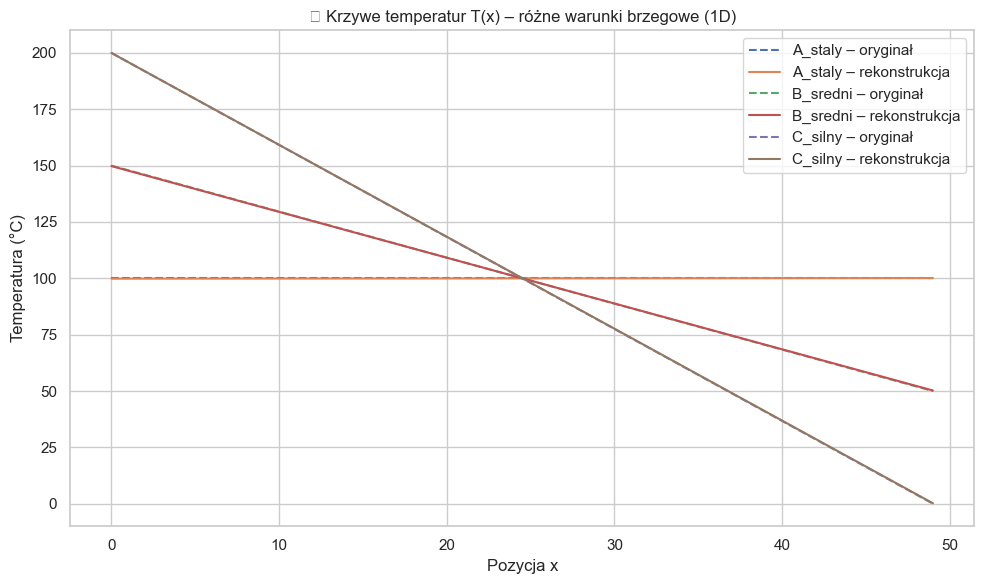

In [42]:
plt.figure(figsize=(10, 6))

for case in cases_1d:
    name = case["name"]
    T_target = solve_temperature_homogeneous(case["Tleft"], case["Tright"], 50)
    best_row = df_bc_1d[df_bc_1d["case"] == name].iloc[0]
    T_est = solve_temperature_homogeneous(best_row["Tleft_est"], best_row["Tright_est"], 50)
    
    plt.plot(T_target, label=f"{name} – oryginał", linestyle="--")
    plt.plot(T_est, label=f"{name} – rekonstrukcja")

plt.title("📏 Krzywe temperatur T(x) – różne warunki brzegowe (1D)")
plt.xlabel("Pozycja x")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Testy dla przypadków 2D

In [43]:
cases_2d = [
    {"name": "A_jednolite", "Ttop": 100, "Tbottom": 100, "Tleft": 100, "Tright": 100},
    {"name": "B_silny_gradient", "Ttop": 300, "Tbottom": 100, "Tleft": 200, "Tright": 0},
    {"name": "C_asymetria", "Ttop": 200, "Tbottom": 200, "Tleft": 100, "Tright": 50}
]

results_2d_bc = []
Nx = Ny = 20

for case in cases_2d:
    T_target = solve_temperature_2d(case["Ttop"], case["Tbottom"], case["Tleft"], case["Tright"], Nx, Ny)
    
    best, fitness_val, history = run_ag_2d_with_selection(
        T_target=T_target,
        Nx=Nx,
        Ny=Ny,
        selection_type="tournament",
        pop_size=50,
        num_generations=100,
        mutation_rate=0.2,
        crossover_rate=0.9,
        verbose=False
    )
    
    results_2d_bc.append({
        "name": case["name"],
        "fitness": fitness_val,
        "generations": len(history),
        "Ttop_err": abs(best[0] - case["Ttop"]),
        "Tbottom_err": abs(best[1] - case["Tbottom"]),
        "Tleft_err": abs(best[2] - case["Tleft"]),
        "Tright_err": abs(best[3] - case["Tright"]),
        "solution": best,
        "T_target": T_target,
        "T_recon": solve_temperature_2d(*best, Nx, Ny)
    })

df_bc_2d = pd.DataFrame(results_2d_bc)
df_bc_2d["total_error"] = df_bc_2d[["Ttop_err", "Tbottom_err", "Tleft_err", "Tright_err"]].sum(axis=1)
df_bc_2d = df_bc_2d.round(2)

print("📊 Porównanie warunków brzegowych – algorytm 2D:")
display(df_bc_2d[["name", "fitness", "total_error", "generations"]])


KeyboardInterrupt: 

In [ ]:
# Fitness
plt.figure(figsize=(8, 5))
sns.barplot(data=df_bc_2d, x="name", y="fitness", color="skyblue")
plt.title("Fitness – wpływ warunków brzegowych (2D)")
plt.ylabel("Fitness")
plt.xlabel("Przypadek")
plt.tight_layout()
plt.show()

# Suma błędów brzegowych
plt.figure(figsize=(8, 5))
sns.barplot(data=df_bc_2d, x="name", y="total_error", color="orange")
plt.title("Suma błędów brzegowych – 2D")
plt.ylabel("Błąd (°C)")
plt.xlabel("Przypadek")
plt.tight_layout()
plt.show()


In [ ]:
fig, axes = plt.subplots(nrows=len(cases_2d), ncols=2, figsize=(10, 12))

for i, row in enumerate(results_2d_bc):
    ax1, ax2 = axes[i]
    
    im1 = ax1.imshow(row["T_target"], cmap="coolwarm")
    ax1.set_title(f'{row["name"]} – Oryginalna siatka')
    fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

    im2 = ax2.imshow(row["T_recon"], cmap="coolwarm")
    ax2.set_title(f'{row["name"]} – Rekonstrukcja AG')
    fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

plt.suptitle("🧊 Porównanie siatek temperatur (2D) – różne warunki brzegowe", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Zadanie 7*

AG 2D z zapisem siatek (co X generacji)

In [44]:
def run_ag_2d_with_snapshots(
    T_target, Nx, Ny,
    snapshot_every=10,
    selection_type="tournament",
    pop_size=50,
    num_generations=100,
    mutation_rate=0.2,
    crossover_rate=0.9,
    Tmin=0, Tmax=400,
    verbose=False
):
    population = initialize_population_2d(pop_size, Tmin, Tmax)
    best_solution = None
    best_fitness = float('inf')
    fitness_history = []
    snapshots = []

    for gen in range(num_generations):
        # selekcja
        if selection_type == "tournament":
            selected = tournament_selection_2d(population, T_target, Nx, Ny)
        elif selection_type == "roulette":
            selected = roulette_selection_2d(population, T_target, Nx, Ny)
        elif selection_type == "rank":
            selected = rank_selection_2d(population, T_target, Nx, Ny)
        else:
            raise ValueError("Nieznana metoda selekcji")

        next_gen = []
        for i in range(0, pop_size, 2):
            p1 = selected[i]
            p2 = selected[(i + 1) % pop_size]

            if np.random.rand() < crossover_rate:
                c1, c2 = crossover_2d(p1, p2)
            else:
                c1, c2 = p1.copy(), p2.copy()

            if np.random.rand() < mutation_rate:
                c1 = mutate_2d(c1, Tmin, Tmax)
            if np.random.rand() < mutation_rate:
                c2 = mutate_2d(c2, Tmin, Tmax)

            next_gen.extend([c1, c2])

        population = np.array(next_gen)

        # najlepszy osobnik
        for ind in population:
            error = fitness_2d(ind, T_target, Nx, Ny)
            if error < best_fitness:
                best_fitness = error
                best_solution = ind

        fitness_history.append(best_fitness)

        # zapis snapshotu
        if gen % snapshot_every == 0 or gen == num_generations - 1:
            T_snapshot = solve_temperature_2d(*best_solution, Nx, Ny)
            snapshots.append((gen, T_snapshot.copy()))

        if verbose:
            print(f"Gen {gen:3d} | Fitness: {best_fitness:.2f}")

    return best_solution, fitness_history, snapshots


In [45]:
def visualize_temperature_evolution(snapshots, cmap="coolwarm"):
    num_snapshots = len(snapshots)
    cols = 4
    rows = (num_snapshots + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))

    for idx, (gen, T_grid) in enumerate(snapshots):
        r, c = divmod(idx, cols)
        ax = axes[r][c] if rows > 1 else axes[c]
        im = ax.imshow(T_grid, cmap=cmap)
        ax.set_title(f"Gen {gen}")
        ax.axis("off")
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    # Ukryj puste pola jeśli niepełna siatka
    for i in range(len(snapshots), rows * cols):
        r, c = divmod(i, cols)
        ax = axes[r][c] if rows > 1 else axes[c]
        ax.axis("off")

    plt.suptitle("🧊 Ewolucja siatek temperatur (2D) w czasie", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [ ]:
# Warunki testowe
T2D_target = solve_temperature_2d(300, 100, 200, 0, 20, 20)

# Uruchomienie AG z zapisami
best, history, snapshots = run_ag_2d_with_snapshots(
    T_target=T2D_target,
    Nx=20, Ny=20,
    snapshot_every=10,
    pop_size=50,
    num_generations=100,
    mutation_rate=0.2,
    crossover_rate=0.9,
    selection_type="tournament",
    verbose=False
)

# Rysowanie snapshotów
visualize_temperature_evolution(snapshots)
